## COVID19 Impact Analysis for India

Preapred By: <b>Purnananda Behera</b>

##### Current world situation, current India situation VS top 10 countries and Predicting next 5 days cases and deaths with Polynomial Regression

![alt text](https://media.giphy.com/media/dVuyBgq2z5gVBkFtDc/giphy.gif)


## 1. COVID19 Data Analysis

### Import packages

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs import *

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

import warnings

%config InlineBackend.figure_format = 'retina'

warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Fetch the global COVID19 data
- Data Source: https://github.com/CSSEGISandData/COVID-19
- Data Maintained By: Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE):
https://systems.jhu.edu/

In [2]:
conf = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
rec = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
dea = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

confirmed = pd.read_csv(conf)
recovered = pd.read_csv(rec)
deaths = pd.read_csv(dea)

In [3]:
confirmed.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819


In [4]:
recovered.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459,1516,1559,1592,1637


In [5]:
deaths.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721,733,746,774,807,819,826
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55,58,62,65,69,72,74


### Current situation around the world in top 20 countries in number of confirmed cases

In [6]:
last_update = confirmed.columns[-1]

current_cases = confirmed
current_cases = current_cases[['Country/Region',last_update]]

current_cases = current_cases.groupby('Country/Region').sum().sort_values(by=last_update, ascending=False)

current_cases['recovered'] = recovered[['Country/Region',last_update]].groupby('Country/Region').sum().sort_values(by=last_update,ascending=False)

current_cases['deaths'] = deaths[['Country/Region',last_update]].groupby('Country/Region').sum().sort_values(by=last_update,ascending=False)

current_cases['active'] = current_cases[last_update]-current_cases['recovered']-current_cases['deaths']

current_cases = current_cases.rename(columns={last_update:'confirmed'
                                              ,'recovered':'recovered'
                                              ,'deaths':'deaths'
                                              ,'active':'active'})

current_cases.head(20).style.background_gradient(cmap='Purples')

,confirmed,recovered,deaths,active
Country/Region,,,,
US,2839436,894325,129676,1815435
Brazil,1577004,990731,64265,522008
Russia,673564,446127,10011,217426
India,673165,409083,19268,244814
Peru,299080,189621,10412,99047
Chile,291847,257451,6192,28204
United Kingdom,286412,1375,44283,240754
Mexico,252165,195724,30366,26075
Spain,250545,150376,28385,71784


#### Cases growth over the time in top 10 countries in confirmed cases numbers

In [7]:
top_10_confirmed = confirmed[(confirmed['Country/Region']=='India') |
                             (confirmed['Country/Region']=='Brazil') |
                             (confirmed['Country/Region']=='US') |
                             (confirmed['Country/Region']=='China') |
                             (confirmed['Country/Region']=='Italy') |
                             (confirmed['Country/Region']=='Spain') |
                             (confirmed['Country/Region']=='Germany') |
                             (confirmed['Country/Region']=='France') |
                             (confirmed['Country/Region']=='Iran') |
                             (confirmed['Country/Region']=='United Kingdom') |
                             (confirmed['Country/Region']=='Russia') |
                             (confirmed['Country/Region']=='Turkey')]

top_10_confirmed = top_10_confirmed.groupby(top_10_confirmed['Country/Region']).sum()

top_10_confirmed = top_10_confirmed.drop(['Lat','Long'], axis = 1)
top_10_confirmed = top_10_confirmed.transpose()

In [8]:
top_10_countries = top_10_confirmed 

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)'
    , plot_bgcolor='rgba(0,0,0,0)'
    , title="Cases over time in top 10 countries in confirmed cases numbers"
)

index = top_10_countries.index
data = top_10_countries

fig = go.Figure(data=[
    
    go.Line(name='US', x = index, y=data['US'])
    , go.Line(name='India', x = index, y=data['India'])
    , go.Line(name='Brazil', x = index, y=data['Brazil'])
    , go.Line(name='China', x = index, y=data['China'])
    , go.Line(name='Italy', x = index, y=data['Italy'])
    , go.Line(name='Spain', x = index, y=data['Spain'])
    , go.Line(name='Germany', x=index, y=data['Germany'])
    , go.Line(name='France', x=index , y=data['France'])
    , go.Line(name='Iran', x = index, y=data['Iran'])
    , go.Line(name='United Kingdom', x = index, y=data['United Kingdom'])
    , go.Line(name='Russia', x = index, y=data['Russia'])
    , go.Line(name='Turkey', x = index, y=data['Turkey'])
    
])

fig['layout'].update(layout)

fig.show()

In [9]:
top_10_confirmed.head(10)

Country/Region,Brazil,China,France,Germany,India,Iran,Italy,Russia,Spain,Turkey,US,United Kingdom
1/22/20,0,548,0,0,0,0,0,0,0,0,1,0
1/23/20,0,643,0,0,0,0,0,0,0,0,1,0
1/24/20,0,920,2,0,0,0,0,0,0,0,2,0
1/25/20,0,1406,3,0,0,0,0,0,0,0,2,0
1/26/20,0,2075,3,0,0,0,0,0,0,0,5,0
1/27/20,0,2877,3,1,0,0,0,0,0,0,5,0
1/28/20,0,5509,4,4,0,0,0,0,0,0,5,0
1/29/20,0,6087,5,4,0,0,0,0,0,0,5,0
1/30/20,0,8141,5,4,1,0,0,0,0,0,5,0
1/31/20,0,9802,5,5,1,0,2,2,0,0,7,2


### Top 10 countries VS India since first case appear

In [10]:
top10_since_first_case = top_10_confirmed.reset_index()
top10_since_first_case = top10_since_first_case.drop('index',axis=1)
top10_since_first_case['Brazil'] = top10_since_first_case['Brazil'].shift(-35) 
top10_since_first_case['India'] = top10_since_first_case['India'].shift(-8)    # 1/30/2020
top10_since_first_case['France'] = top10_since_first_case['France'].shift(-2)
top10_since_first_case['Germany'] = top10_since_first_case['Germany'].shift(-5)
top10_since_first_case['Iran'] = top10_since_first_case['Iran'].shift(-28)
top10_since_first_case['Italy'] = top10_since_first_case['Italy'].shift(-9)
top10_since_first_case['Spain'] = top10_since_first_case['Spain'].shift(-10)
top10_since_first_case['Russia'] = top10_since_first_case['Russia'].shift(-9)  # 1/31/2020
top10_since_first_case['Turkey'] = top10_since_first_case['Turkey'].shift(-49)
top10_since_first_case['United Kingdom'] = top10_since_first_case['United Kingdom'].shift(-9)

In [11]:
# creating the plot
top10_since_first_case_log = np.log(top10_since_first_case)

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)'
    , plot_bgcolor='rgba(0,0,0,0)'
    , title="Log Top 10 countries VS India since first case appear"
)

index = top10_since_first_case_log.index
data = top10_since_first_case_log

fig = go.Figure(data=[
    
    go.Line(name='Brazil', x=index , y=data['Brazil'])
    , go.Line(name='India', x=index , y=data['India'])
    , go.Line(name='US', x = index, y=data['US'])
    , go.Line(name='Italy', x = index, y=data['Italy'])
    , go.Line(name='China', x = index, y=data['China'])
    , go.Line(name='Spain', x = index, y=data['Spain'])
    , go.Line(name='Germany', x=index, y=data['Germany'])
    , go.Line(name='France', x=index , y=data['France'])
    , go.Line(name='Iran', x = index, y=data['Iran'])
    , go.Line(name='United Kingdom', x = index, y=data['United Kingdom'])
    , go.Line(name='Russia', x = index, y=data['Russia'])
    , go.Line(name='Turkey', x = index, y=data['Turkey'])
  
])

fig['layout'].update(layout)

fig.show()

### Current situation in India

In [12]:
from requests import request
import urllib.request
import json
from pandas.io.json import json_normalize

def read_from_api(URL, x=None):
    """
    Read data from API and Return Normalized JSON
    
    Keyword arguments:
    URL -- String API URL
    x -- String name to normalize API request into JSON
    """
    response = request(url=URL, method='get')
    elevations = response.json()
    return json_normalize(elevations) if x==None else json_normalize(elevations[x])

In [13]:
india_timeseries_csv = 'https://api.covid19india.org/csv/latest/case_time_series.csv' 
india_data = pd.read_csv(india_timeseries_csv)
# india_data = read_from_api('https://api.covid19india.org/data.json','cases_time_series')
india_data['Date'] = india_data['Date'] + " 2020"
india_data['Date'] = pd.to_datetime(india_data['Date'])
india_data.head(2)

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0


In [14]:
india_data["Total Active"] = india_data["Total Confirmed"] - (india_data["Total Recovered"] + india_data["Total Deceased"])

In [15]:
india_data.tail(2)

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Total Active
156,2020-07-04,24018,673907,14746,409066,611,19282,245559
157,2020-07-05,23932,697839,15826,424892,420,19702,253245


In [16]:
india_data.isnull().sum().head()

Date               0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
dtype: int64

In [17]:
india_data.set_index('Date', inplace=True)

#### Total cases over the time

In [18]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)'
    , plot_bgcolor='rgba(0,0,0,0)'
)

fig = make_subplots(rows=2, cols=1
                    , subplot_titles=('Confirmed cases', 'Deaths'))

fig.append_trace(go.Line(name='Confirmed'
                        , x = india_data.index
                        , y = india_data['Total Confirmed']
                        , mode="lines+markers")
                        , row=1, col=1)

fig.append_trace(go.Line(name='Deaths'
                        , x = india_data.index
                        , y = india_data['Total Deceased']
                        , mode="lines+markers")
                        , row=2, col=1)

fig['layout'].update(layout)

fig.show()

#### Total Cases in India

In [19]:
layout = Layout(
    paper_bgcolor='white'
    , plot_bgcolor='white'
    , title="Total Cases in India"
)


fig = go.Figure(data=[    
    go.Line(name='Confirmed', x=index ,y=india_data['Total Confirmed'], mode="lines+markers", marker=dict(color='Red'))
    , go.Line(name='Recovered', x=index, y=india_data['Total Recovered'], mode="lines+markers", marker=dict(color='Green'))
    , go.Line(name='Deaths', x=index, y=india_data['Total Deceased'], mode="lines+markers", marker=dict(color='Brown'))  
    , go.Line(name='Active', x=index, y=india_data['Total Active'], mode="lines+markers", marker=dict(color='Purple'))  
])

fig['layout'].update(layout)

fig.show()

#### Mortality rate over the time

In [20]:
mortality_over_time = round((india_data['Total Deceased']/india_data['Total Confirmed'])*100,2)

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)'
    , plot_bgcolor='rgba(0,0,0,0)'
    , title="Mortality rate over the time"
)

index = mortality_over_time.index
data = mortality_over_time

fig = go.Figure(data=[
    
    go.Line(name='Mortality in %'
            , x = index
            , y=data
            , mode="lines+markers")
    
])

fig['layout'].update(layout)

fig.show()

#### New cases and New deaths per day over the time

In [21]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)'
    , plot_bgcolor='rgba(0,0,0,0)'
)

fig = make_subplots(rows=2, cols=1
                    , subplot_titles=('New cases per day over the time'
                                      , 'New deaths per day over the time'))

fig.append_trace(go.Line(name='New cases per day'
                        , x = india_data.index
                        , y = india_data['Daily Confirmed']
                        , mode="lines+markers")
                        , row=1, col=1)

fig.append_trace(go.Line(name='New deaths per day'
                        , x = india_data.index
                        , y = india_data['Daily Deceased']
                        , mode="lines+markers")
                        , row=2, col=1)

fig['layout'].update(layout)

fig.show()

#### Weekly COVID cases analysis for India

In [22]:
india_data.head(2)

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Total Active
Date,,,,,,,
2020-01-30,1,1,0,0,0,0,1
2020-01-31,0,1,0,0,0,0,1


In [23]:
import datetime
import time

def getDateRangeFromWeek(p_year,p_week):

    firstdayofweek = datetime.datetime.strptime(f'{p_year}-W{int(p_week )- 1}-1', "%Y-W%W-%w").date()
    lastdayofweek = firstdayofweek + datetime.timedelta(days=6.9)
    return firstdayofweek, lastdayofweek

In [24]:
#Call function to get dates range 
firstdate, lastdate =  getDateRangeFromWeek('2020','16')

print('print function ',firstdate,' ', lastdate)

print function  2020-04-13   2020-04-19


In [25]:
india_data["WeekOfYear"] = india_data.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]

w=1
for i in list(india_data["WeekOfYear"].unique()):
    weekwise_confirmed.append(india_data[india_data["WeekOfYear"]==i]["Daily Confirmed"].sum())
    weekwise_recovered.append(india_data[india_data["WeekOfYear"]==i]["Daily Recovered"].sum())
    weekwise_deaths.append(india_data[india_data["WeekOfYear"]==i]["Daily Deceased"].sum())
    week_num.append(w)
    w=w+1

In [26]:
cases_date_range = str(india_data.index.min().strftime("%d %B")) + ' - ' + str(india_data.index.max().strftime("%d %B"))
cases_date_range

'30 January - 05 July'

In [27]:

fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num, y=weekwise_confirmed,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_recovered,
                    mode='lines+markers',
                    name='Weekly Growth of Recovered Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_deaths,
                    mode='lines+markers',
                    name='Weekly Growth of Death Cases'))
fig.update_layout(title="Weekly Growth of different types of Cases in India",
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Text(0.5, 1.0, 'Number of Recovered Cases (30 January - 05 July)')

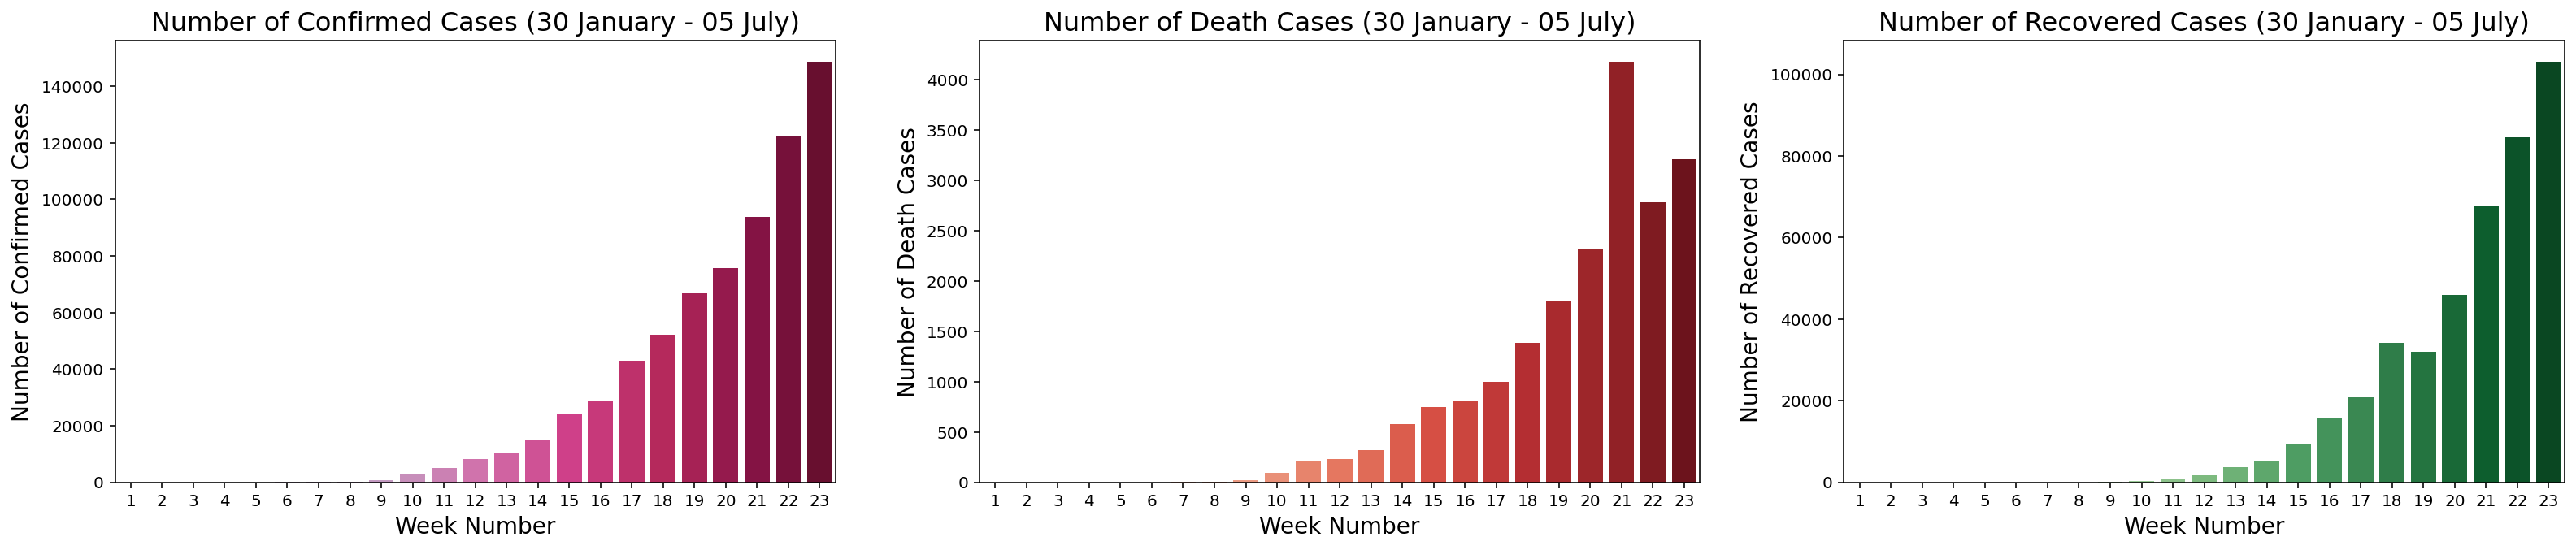

In [28]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(27,5))

sns.barplot(x=week_num,y=weekwise_confirmed,ax=ax1, palette="PuRd")
sns.barplot(x=week_num,y=weekwise_deaths,ax=ax2, palette="Reds")
sns.barplot(x=week_num,y=weekwise_recovered,ax=ax3, palette="Greens")

ax1.set_xlabel("Week Number", size = 14)
ax2.set_xlabel("Week Number", size = 14)
ax3.set_xlabel("Week Number", size = 14)

ax1.set_ylabel("Number of Confirmed Cases", size = 14)
ax2.set_ylabel("Number of Death Cases", size = 14)
ax3.set_ylabel("Number of Recovered Cases", size = 14)

ax1.set_title("Number of Confirmed Cases (" + cases_date_range + ")", size = 16)
ax2.set_title("Number of Death Cases (" + cases_date_range + ")", size = 16)
ax3.set_title("Number of Recovered Cases (" + cases_date_range + ")", size = 16)

### Current situation in India by state

In [29]:
india_statewise_csv = 'https://api.covid19india.org/csv/latest/state_wise.csv'

india_satatewise_data = pd.read_csv(india_statewise_csv, skiprows=0)
india_satatewise_data.set_index('State', inplace=True)

# Drop the Total column
india_satatewise_data.drop('Total', axis=0, inplace=True) 

india_satatewise_data.head(3)

,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
State,,,,,,,,,,,
Maharashtra,206619,111740,8822,86040,05/07/2020 21:06:27,17,MH,6555,3658,151,17 cases were marked as non-covid deaths in MH...
Tamil Nadu,111151,62778,1510,46863,05/07/2020 20:07:27,0,TN,4150,2186,60,2 deaths cross notified to other states from C...
Delhi,99444,71339,3067,25038,05/07/2020 19:06:27,0,DL,2244,3083,63,"Delhi bulletins in the morning, containing dat..."


In [30]:
india_satatewise_data.drop(india_satatewise_data[india_satatewise_data['Confirmed'] < 1].index, inplace=True) 

#### Cases and Deaths by state

In [31]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title="Cases and Deaths by state (deaths highlighted by numbers)"
)

fig = go.Figure(data=[
    
    go.Bar(name='cases'
           , x=india_satatewise_data.index
           , y=india_satatewise_data['Confirmed']),
    
    go.Bar(name='deaths'
           , x=india_satatewise_data.index
           , y=india_satatewise_data['Deaths']
           , text=india_satatewise_data['Deaths']
           , textposition='outside')
])

fig.update_layout(barmode='stack')
fig['layout'].update(layout)

fig.show()

#### Mortality rate by state

In [32]:
mortality_by_state = round((india_satatewise_data['Deaths']/india_satatewise_data['Confirmed'])*100,2)
mortality_by_state = mortality_by_state.sort_values(ascending=False)

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title="Mortality rate by state"
)

fig = go.Figure(data=[
    
    go.Bar(x=mortality_by_state.index
           , y=mortality_by_state)
])

fig.update_layout(barmode='stack')
fig['layout'].update(layout)

fig.show()

## 2. COVID19 Data Modeling & Prediction

### 2.1 Using Polynomial Regression

In [33]:
india_data_flt = india_data[["Total Confirmed", "Total Recovered", "Total Deceased"]]

# Taking confirmed cases since first case appear in 1/30/2020
cases = india_data_flt[india_data_flt["Total Confirmed"] > 0]["Total Confirmed"]
deaths = india_data_flt[india_data_flt["Total Deceased"] > 0]["Total Deceased"]

cases.head(3)


Date
2020-01-30    1
2020-01-31    1
2020-02-01    1
Name: Total Confirmed, dtype: int64

#### Days since first case

In [34]:
days_since_first_case = np.array([i for i in range(len(cases.index))]).reshape(-1, 1)
india_cases = np.array(cases).reshape(-1, 1)
len(days_since_first_case)

158

In [35]:
# First Case
cases.index.min().strftime("%d-%m-%Y")

'30-01-2020'

#### Days since first death

In [36]:
days_since_first_death = np.array([i for i in range(len(deaths.index))]).reshape(-1, 1)
india_deaths = np.array(deaths).reshape(-1, 1)
len(days_since_first_death)

116

In [37]:
# First Death
deaths.index.min().strftime("%d-%m-%Y")

'12-03-2020'

#### Preparing indexes to predict next 5 days

In [38]:
days_in_future = 30 # No of days to predict in future

# Preparing indexes to predict next [days_in_future] days.
future_forcast = np.array([i for i in range(len(cases.index)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-days_in_future]

future_forcast_deaths = np.array([i for i in range(len(deaths.index)+days_in_future)]).reshape(-1, 1)
adjusted_dates_deaths = future_forcast_deaths[:-days_in_future]

In [39]:
len(future_forcast)


188

In [40]:
#Splitting data into train and test to evaluate our model
X_train, X_test, y_train, y_test = train_test_split(days_since_first_case
                                                    , india_cases
                                                    , test_size= 5
                                                    , shuffle=False
                                                    , random_state = 42) 

X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(days_since_first_death
                                                    , india_deaths
                                                    , test_size= 5
                                                    , shuffle=False
                                                    , random_state = 42) 

### Modeling
Now let's use our prepared data into poly.fit function and transform our data to be used into a regression latter. To find the best degree for our PolynomialFeatures function, let's use a simple loop that evaluate RMSE in test dataset and selected the best degree for the current prediction.

In [41]:
# looking for best degree for deaths
rmse = 10000
degree = 0
for i in range(101):
    # Transform our cases data for polynomial regression
    poly = PolynomialFeatures(degree=i)
    poly_X_train = poly.fit_transform(X_train)
    poly_X_test = poly.fit_transform(X_test)
    poly_future_forcast = poly.fit_transform(future_forcast)

    # polynomial regression cases
    linear_model = LinearRegression(normalize=True, fit_intercept=False)
    linear_model.fit(poly_X_train, y_train)
    test_linear_pred = linear_model.predict(poly_X_test)
    linear_pred = linear_model.predict(poly_future_forcast)

    # evaluating with RMSE
    rm = sqrt(mean_squared_error(y_test, test_linear_pred))
    if(rm<rmse):
        rmse = rm
        degree = i
    if(i==100):
        print('the best mae is:',round(rmse,2))
        print('the best degree for cases is:',degree)

the best mae is: 2386.29
the best degree for cases is: 7


In [42]:
# looking for best degree for deaths
rmse = 10000
degree = 0
for i in range(101):
    # Transform our death data for polynomial regression
    poly_death = PolynomialFeatures(degree=i)
    poly_X_train_death = poly_death.fit_transform(X_train_death)
    poly_X_test_death = poly_death.fit_transform(X_test_death)
    poly_future_forcast_death = poly_death.fit_transform(future_forcast_deaths)

    # polynomial regression deaths
    linear_model_death = LinearRegression(normalize=True, fit_intercept=False)
    linear_model_death.fit(poly_X_train_death, y_train_death)
    test_linear_pred_death = linear_model_death.predict(poly_X_test_death)
    linear_pred_death = linear_model_death.predict(poly_future_forcast_death)

     # evaluating with RMSE
    rm = sqrt(mean_squared_error(y_test_death, test_linear_pred_death))
    if(rm<rmse):
        rmse = rm
        degree = i
    if(i==100):
        print('the best mae is:',round(rmse,2))
        print('the best degree for cases is:',degree)

the best mae is: 244.04
the best degree for cases is: 13


<b>Perfect!</b> Now that we already have the bests degree for death and cases prediction, let's put into poly.fit again and transform our data for polynomial regression.

In [43]:
# Transform our cases data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)
poly_future_forcast = poly.fit_transform(future_forcast)

# Transform our death data for polynomial regression
poly_death = PolynomialFeatures(degree=5)
poly_X_train_death = poly_death.fit_transform(X_train_death)
poly_X_test_death = poly_death.fit_transform(X_test_death)
poly_future_forcast_death = poly_death.fit_transform(future_forcast_deaths)

Training, predicting and evaluating polynomial regression into confirmed cases

In [44]:
# polynomial regression cases
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train, y_train)
test_linear_pred = linear_model.predict(poly_X_test)
linear_pred = linear_model.predict(poly_future_forcast)

# evaluating with RMSE
print('RMSE:', sqrt(mean_squared_error(y_test, test_linear_pred)))

RMSE: 9776.917123736825


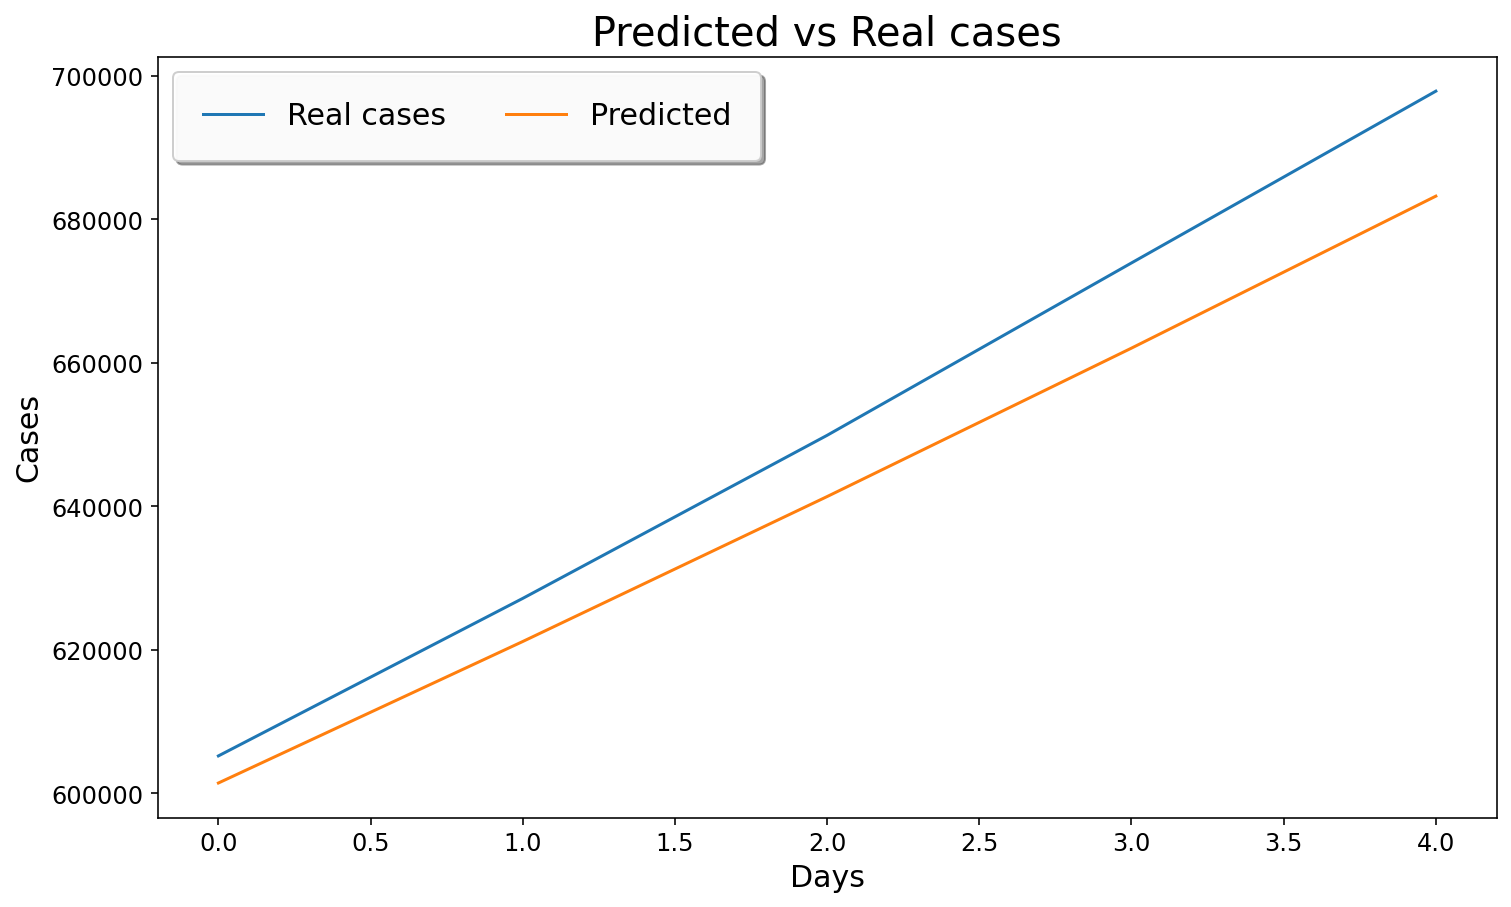

In [45]:
plt.figure(figsize=(12,7))

plt.plot(y_test, label = "Real cases")
plt.plot(test_linear_pred, label = "Predicted")
plt.title("Predicted vs Real cases", size = 20)
plt.xlabel('Days', size = 15)
plt.ylabel('Cases', size = 15)
plt.xticks(size=12)
plt.yticks(size=12)

# defyning legend config
plt.legend(loc = "upper left"
           , frameon = True
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1
           , prop={'size': 15});

In [46]:
from datetime import date, timedelta
##india_data.index.max()
def getSpecificDate(noofdays):
    return (india_data.index.max() + timedelta(days=noofdays)).strftime("%d-%m-%Y")
    #return str(date.today() + timedelta(days=noofdays))    

getSpecificDate(0)

'05-07-2020'

In [47]:
# Prepare predict_dates list based on days_in_future value
predict_dates = []

for x in range(days_in_future):
  predict_dates.append(getSpecificDate(x+1))

print(predict_dates)

['06-07-2020', '07-07-2020', '08-07-2020', '09-07-2020', '10-07-2020', '11-07-2020', '12-07-2020', '13-07-2020', '14-07-2020', '15-07-2020', '16-07-2020', '17-07-2020', '18-07-2020', '19-07-2020', '20-07-2020', '21-07-2020', '22-07-2020', '23-07-2020', '24-07-2020', '25-07-2020', '26-07-2020', '27-07-2020', '28-07-2020', '29-07-2020', '30-07-2020', '31-07-2020', '01-08-2020', '02-08-2020', '03-08-2020', '04-08-2020']


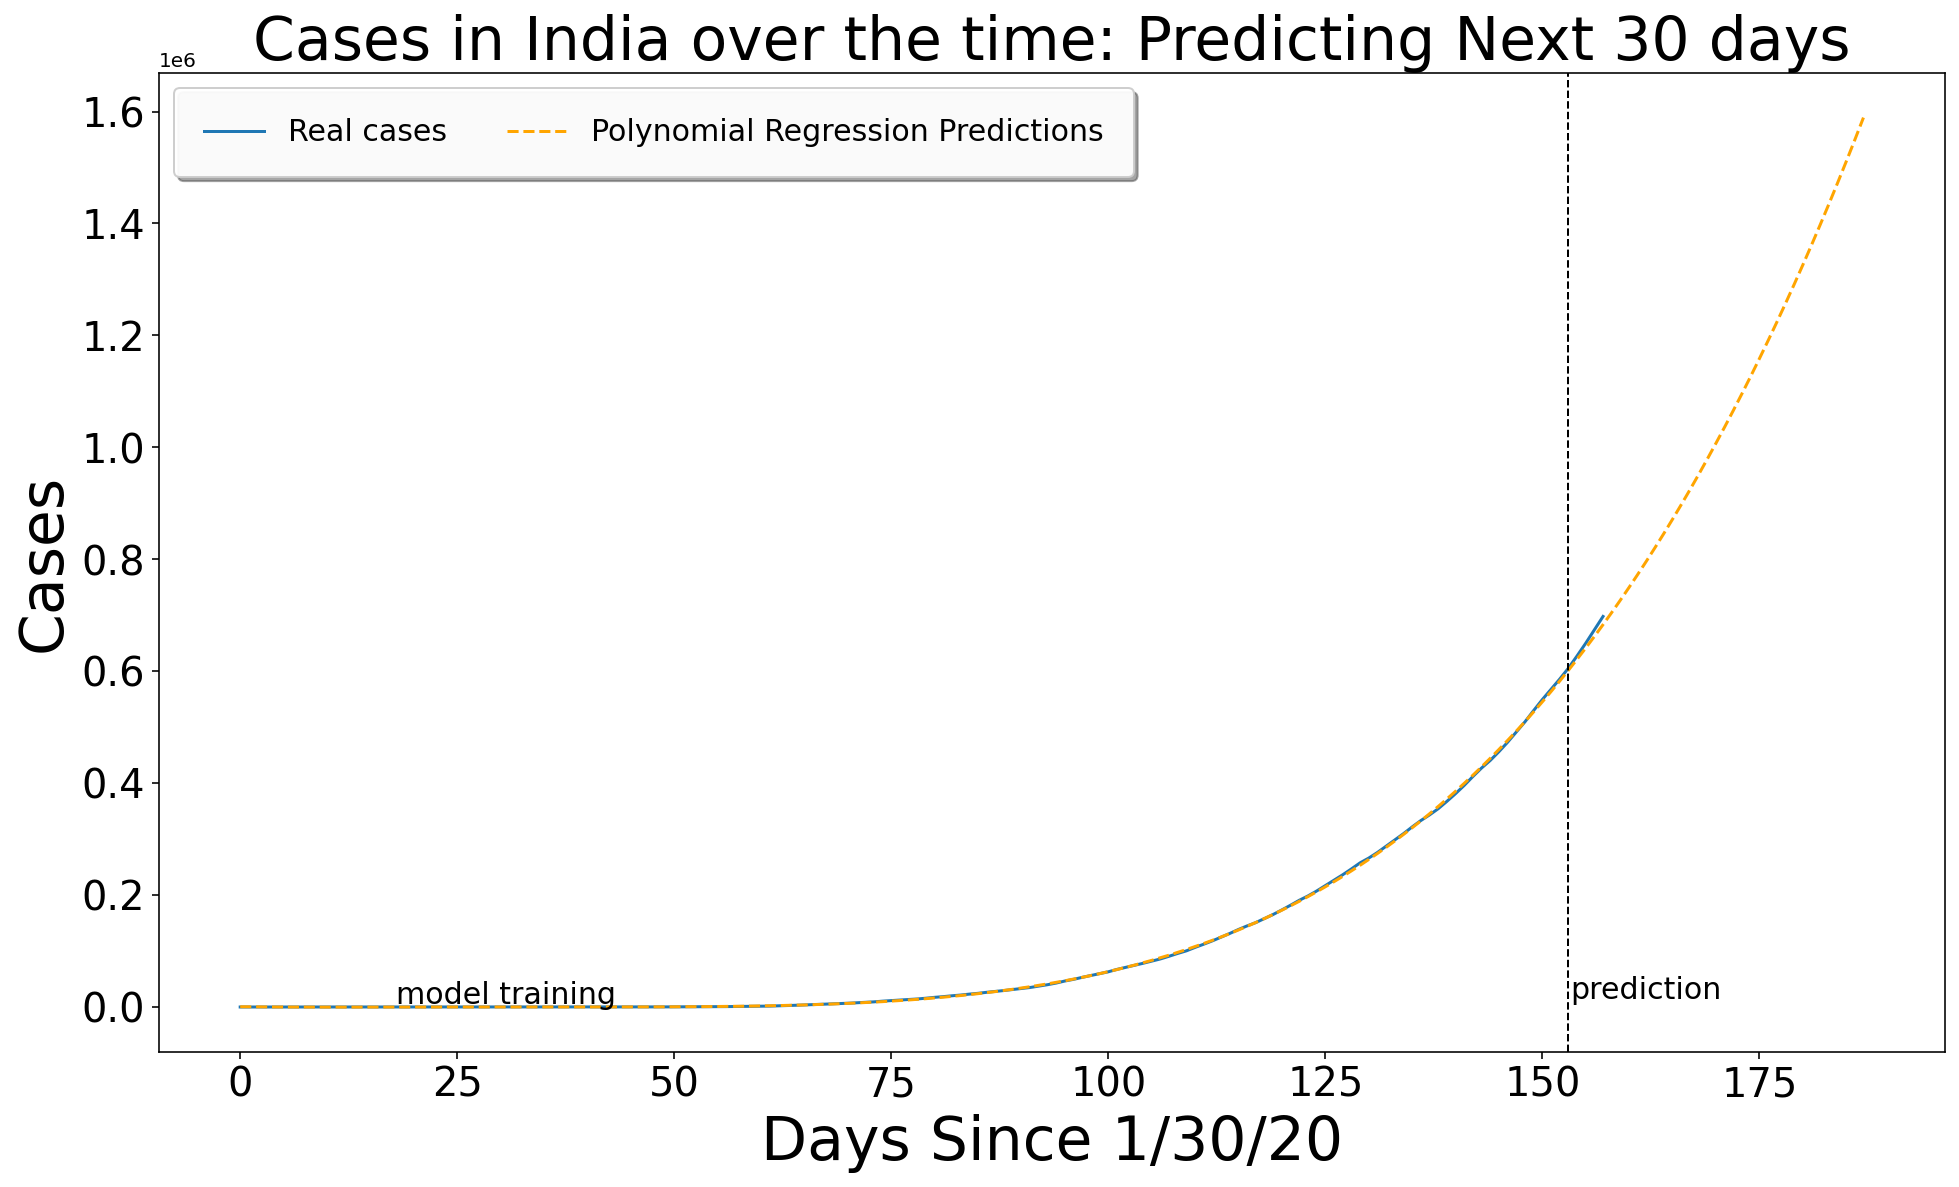

In [48]:
plt.figure(figsize=(16, 9))

plt.plot(adjusted_dates
         , india_cases
         , label = "Real cases")

plt.plot(future_forcast
         , linear_pred
         , label = "Polynomial Regression Predictions"
         , linestyle='dashed'
         , color='orange')

plt.title('Cases in India over the time: Predicting Next '+str(days_in_future)+' days', size=30)
plt.xlabel('Days Since 1/30/20', size=30)
plt.ylabel('Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)

plt.axvline(len(X_train), color='black'
            , linestyle="--"
            , linewidth=1)

plt.text(18, 5000
         , "model training"
         , size = 15
         , color = "black")

plt.text((len(X_train)+0.2), 15000
         , "prediction"
         , size = 15
         , color = "black")

# defyning legend config
plt.legend(loc = "upper left"
           , frameon = True
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1
           , prop={'size': 15})

plt.show();

In [49]:
pd.DataFrame(linear_pred[len(cases):].astype('Int64'), columns = ['Predicted'], index = predict_dates).style.background_gradient(cmap='Reds')

,Predicted
06-07-2020,704888
07-07-2020,727075
08-07-2020,749779
09-07-2020,773010
10-07-2020,796774
11-07-2020,821080
12-07-2020,845936
13-07-2020,871351
14-07-2020,897333
15-07-2020,923889


Training, predicting and evaluating polynomial regression into death cases

In [50]:
# polynomial regression deaths
linear_model_death = LinearRegression(normalize=True, fit_intercept=False)
linear_model_death.fit(poly_X_train_death, y_train_death)
test_linear_pred_death = linear_model_death.predict(poly_X_test_death)
linear_pred_death = linear_model_death.predict(poly_future_forcast_death)

# evaluating with RMSE
print('RMSE:', sqrt(mean_squared_error(y_test_death, test_linear_pred_death)))

RMSE: 997.4082189592093


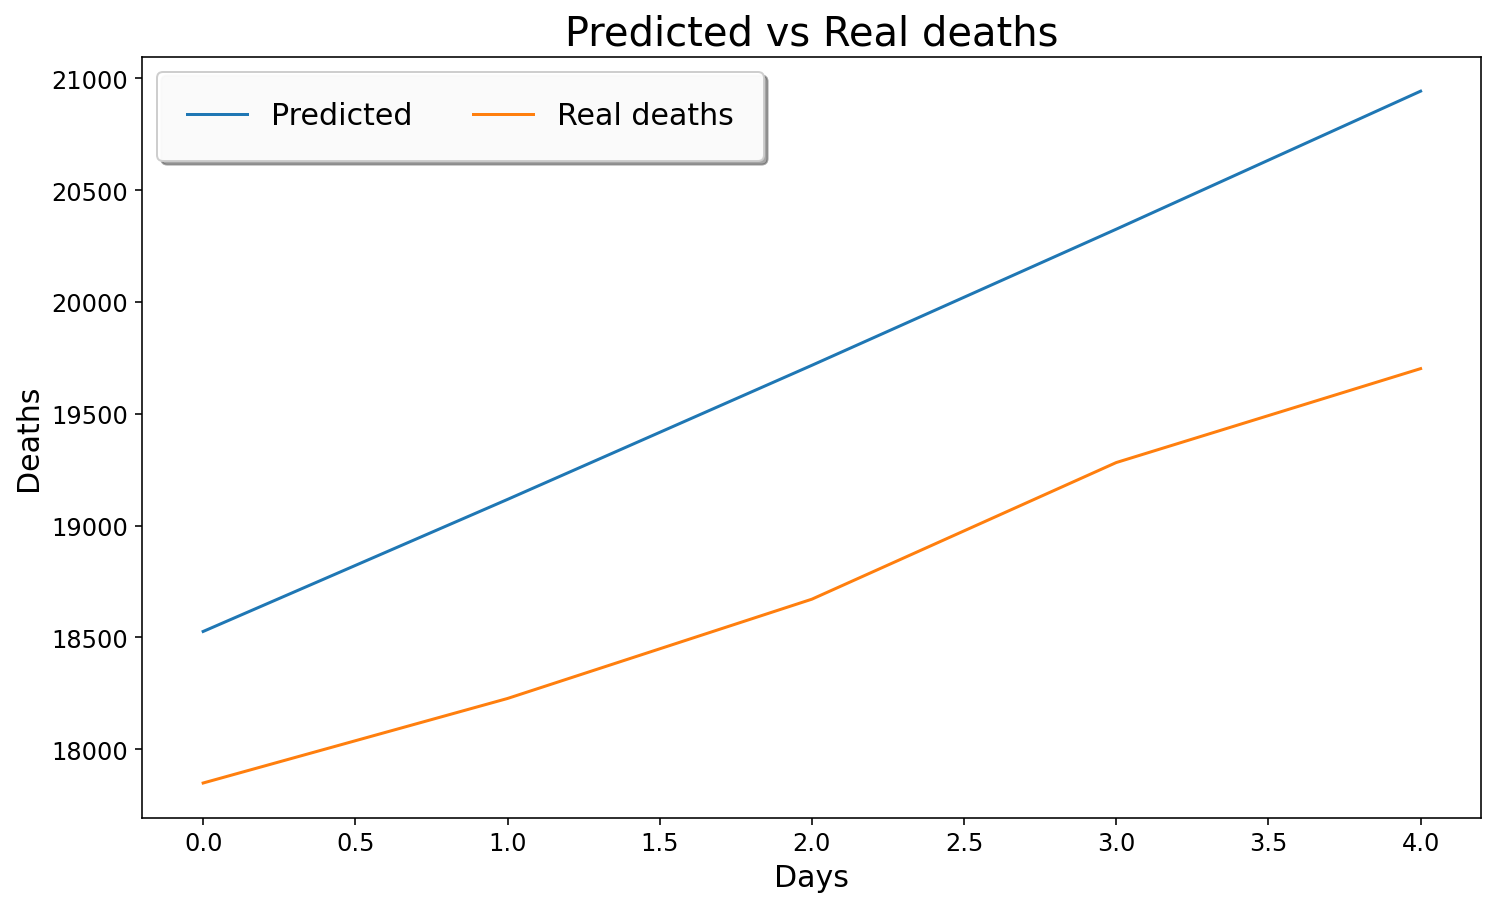

In [51]:
plt.figure(figsize=(12,7))

plt.plot(test_linear_pred_death, label = "Predicted")
plt.plot(y_test_death, label = "Real deaths")
plt.title("Predicted vs Real deaths", size = 20)
plt.xlabel('Days', size = 15)
plt.ylabel('Deaths', size = 15)
plt.xticks(size=12)
plt.yticks(size=12)

# defyning legend config
plt.legend(loc = "upper left"
           , frameon = True
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1
           , prop={'size': 15});

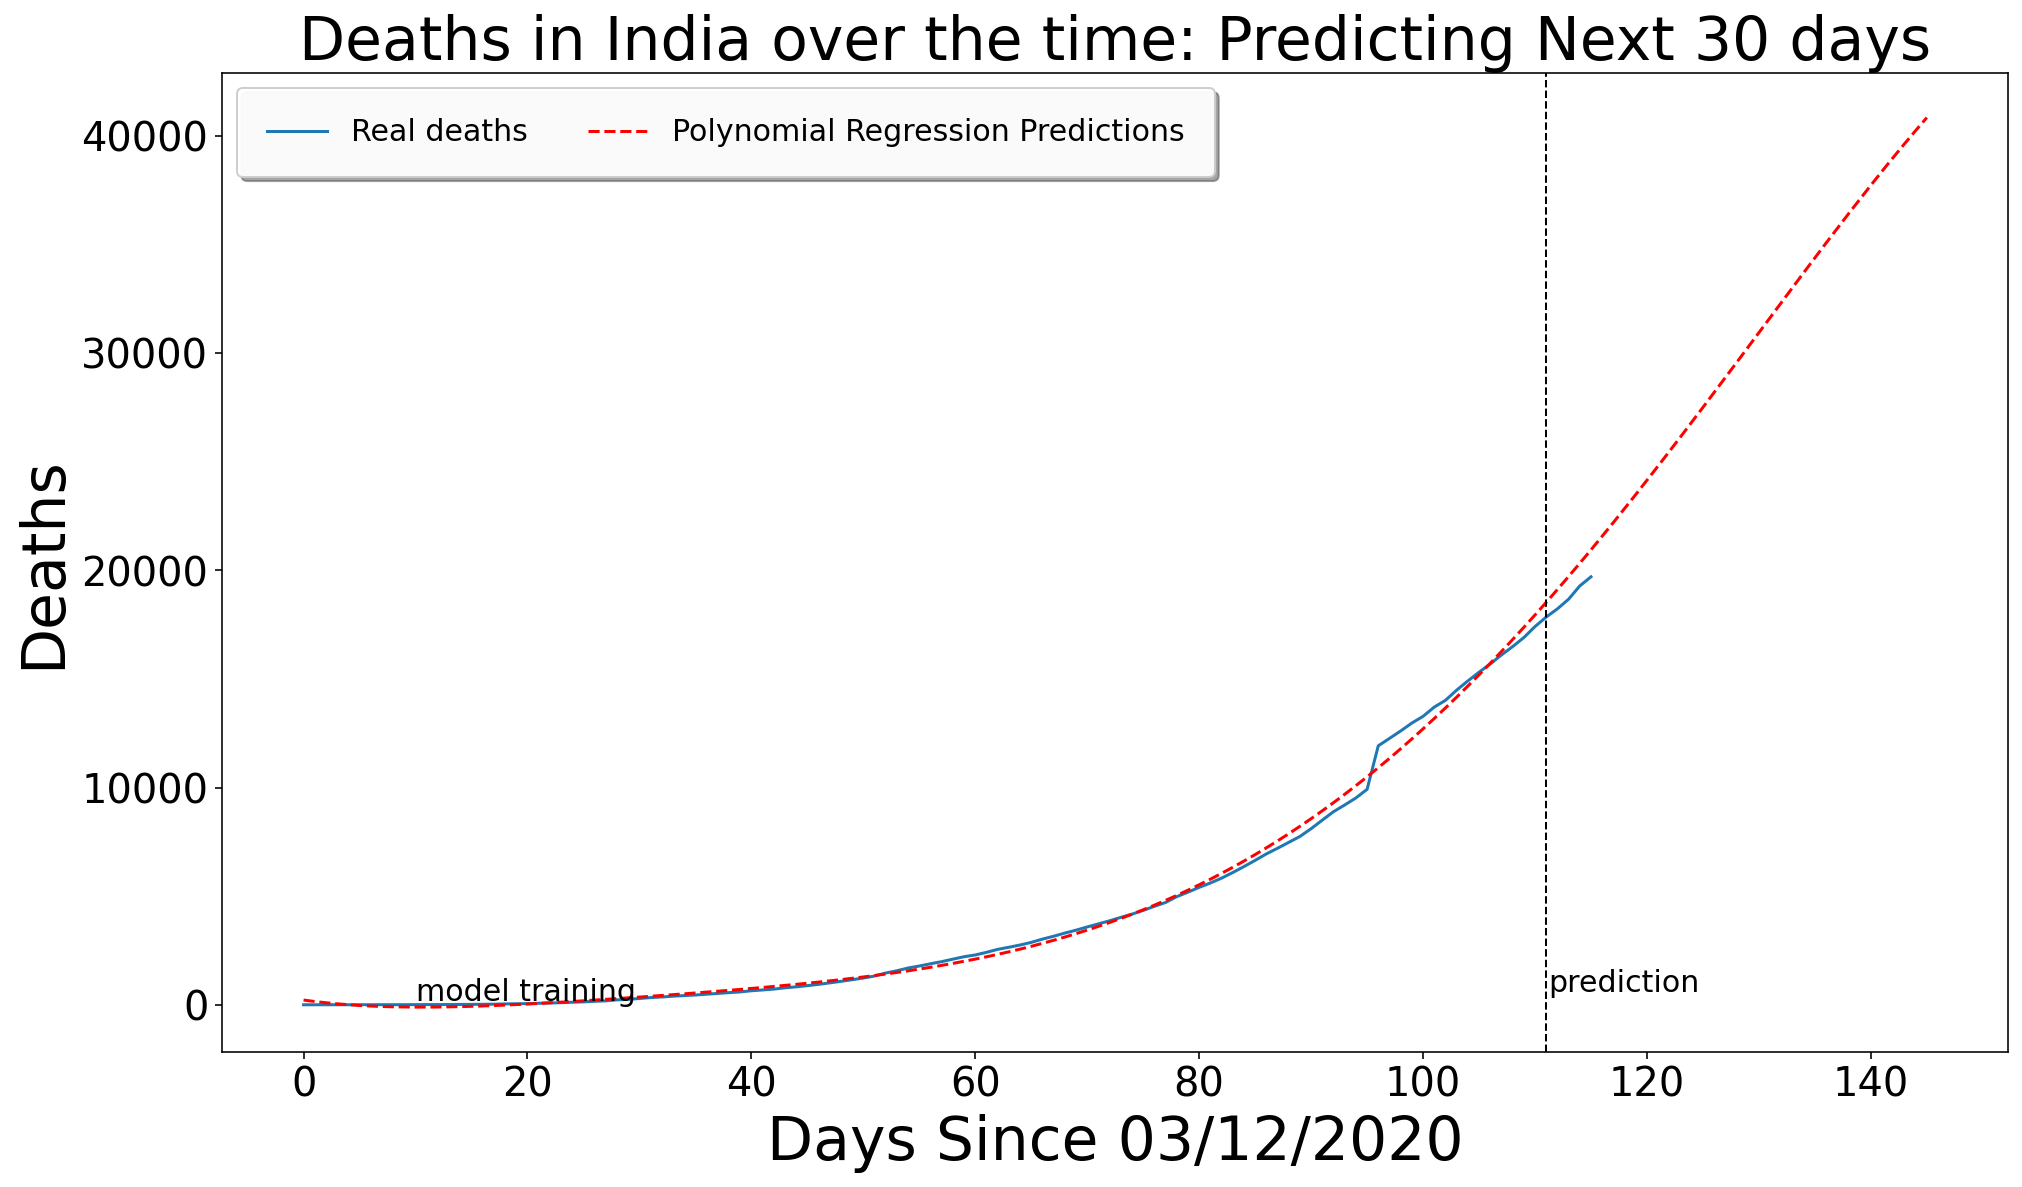

In [52]:
plt.figure(figsize=(16, 9))

plt.plot(adjusted_dates_deaths
         , india_deaths
         , label = "Real deaths")

plt.plot(future_forcast_deaths
         , linear_pred_death
         , label = "Polynomial Regression Predictions"
         , linestyle='dashed'
         , color='red')

plt.title('Deaths in India over the time: Predicting Next '+str(days_in_future)+' days', size=30)
plt.xlabel('Days Since 03/12/2020', size=30)
plt.ylabel('Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)

plt.axvline(len(X_train_death), color='black'
            , linestyle="--"
            , linewidth=1)

plt.text(10, 200
         , "model training"
         , size = 15
         , color = "black")

plt.text((len(X_train_death)+0.2), 600
         , "prediction"
         , size = 15
         , color = "black")

# defyning legend config
plt.legend(loc = "upper left"
           , frameon = True
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1
           , prop={'size': 15})

plt.show();

In [53]:
pd.DataFrame(linear_pred_death[len(deaths):].astype('Int64'), columns = ['Predicted'], index = predict_dates).style.background_gradient(cmap='Reds')

,Predicted
06-07-2020,21568
07-07-2020,22201
08-07-2020,22842
09-07-2020,23490
10-07-2020,24145
11-07-2020,24806
12-07-2020,25472
13-07-2020,26144
14-07-2020,26820
15-07-2020,27501


### 2.2 Using Time Series

Reference Time Series: https://www.kaggle.com/neelkudu28/covid-19-visualizations-predictions-forecasting#Time-Series-Forecasting


• A time series is a sequential set of data points, measured
typically over successive times.

• Time series analysis comprises methods for analyzing time
series data in order to extract meaningful statistics and other
characteristics of the data.

### AR Model (Autoregressive Model)


An **autoregressive (AR) mode**l predicts future behavior based on past behavior. It’s used for forecasting when there is some correlation between values in a time series and the values that precede and succeed them. You only use past data to model the behavior, hence the name autoregressive.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(days_since_first_case
                                                    , india_cases
                                                    , test_size= 5
                                                    , shuffle=False
                                                    , random_state = 42)

In [55]:
#from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

In [56]:
cases.head()

Date
2020-01-30    1
2020-01-31    1
2020-02-01    1
2020-02-02    2
2020-02-03    3
Name: Total Confirmed, dtype: int64

In [57]:
#create train/test datasets
X = cases
noOfDaysToPredict = 10
train_data = X[0:len(X)-noOfDaysToPredict]
test_data = X[len(X)-noOfDaysToPredict:] #Seven days test data

#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

In [58]:
print('Coefficients: %s' % model_fitted.params)

Coefficients: const                  68.049639
L1.Total Confirmed      1.532242
L2.Total Confirmed     -0.285946
L3.Total Confirmed     -0.085371
L4.Total Confirmed     -0.351845
L5.Total Confirmed     -0.031454
L6.Total Confirmed      0.680561
L7.Total Confirmed      0.066039
L8.Total Confirmed     -0.783126
L9.Total Confirmed     -0.186280
L10.Total Confirmed     0.356853
L11.Total Confirmed     0.340385
L12.Total Confirmed    -0.162359
L13.Total Confirmed    -0.088298
dtype: float64


In [59]:
# make predictions
predictions = model_fitted.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test_data[i]))
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=510293.028294, expected=509448.000000
predicted=530036.371893, expected=529590.000000
predicted=548575.552480, expected=549200.000000
predicted=566350.735047, expected=567539.000000
predicted=585673.050794, expected=585795.000000
predicted=606993.344510, expected=605224.000000
predicted=629660.099155, expected=627171.000000
predicted=653444.064051, expected=649889.000000
predicted=677608.687687, expected=673907.000000
predicted=700590.366514, expected=697839.000000
Test RMSE: 2143.998


In [60]:
# # plot results
# pyplot.plot(test_data)
# pyplot.plot(predictions, color='red')
# pyplot.show()

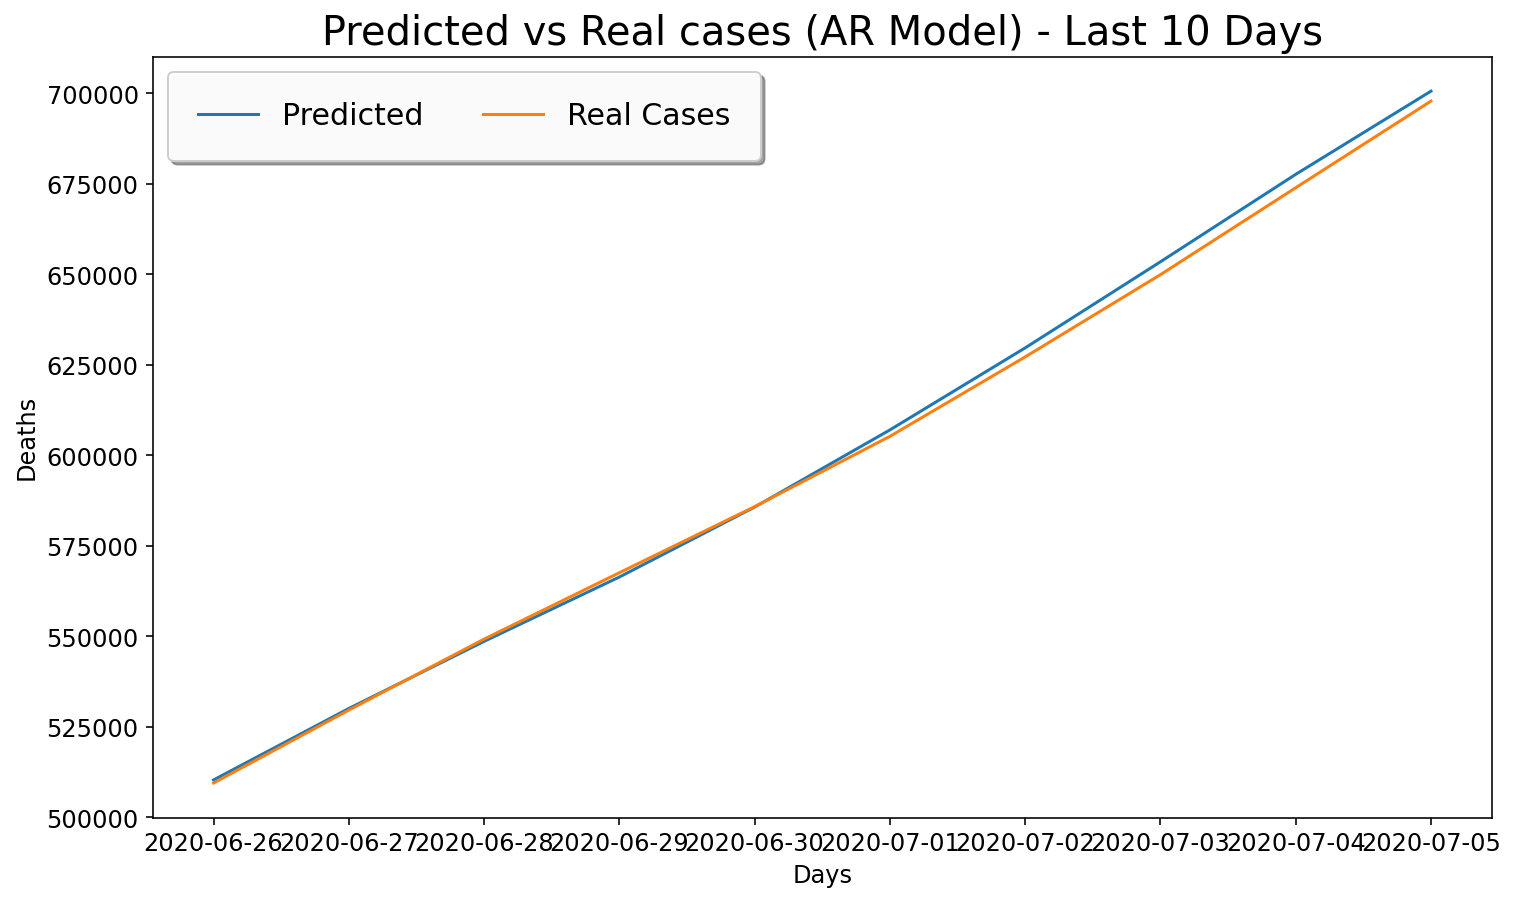

In [61]:
plt.figure(figsize=(12,7))

plot_title = "Predicted vs Real cases (AR Model) - Last " + str(noOfDaysToPredict) + " Days" 

plt.plot(predictions, label = "Predicted")
plt.plot(test_data, label = "Real Cases")
plt.title(plot_title, size = 20)
plt.xlabel('Days', size = 12)
plt.ylabel('Deaths', size = 12)
plt.xticks(size=12)
plt.yticks(size=12)

# defyning legend config
plt.legend(loc = "upper left"
           , frameon = True
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1
           , prop={'size': 15});

### fbprophet Model

In [62]:
# !pip install cython pystan fbprophet
from fbprophet import Prophet

In [63]:
cases.head(2)

Date
2020-01-30    1
2020-01-31    1
Name: Total Confirmed, dtype: int64

In [64]:
total_cases = cases.reset_index()
total_cases.head(2)

,Date,Total Confirmed
0,2020-01-30,1
1,2020-01-31,1


In [65]:
total_cases = total_cases.rename(columns={'Date': 'ds', 'Total Confirmed': 'y'})
total_cases.head(2)

,ds,y
0,2020-01-30,1
1,2020-01-31,1


#### FBP Model 1

In [66]:
TC_FBP_model = Prophet(interval_width=0.95)

In [67]:
TC_FBP_model.fit(total_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [68]:
future_dates = TC_FBP_model.make_future_dataframe(periods=days_in_future, freq='D')
future_dates.tail()

,ds
183,2020-07-31
184,2020-08-01
185,2020-08-02
186,2020-08-03
187,2020-08-04


In [69]:
forecast = TC_FBP_model.predict(future_dates);
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
183,2020-07-31,1.017701e+06,9.662051e+05,1.075662e+06,9.697102e+05,1.070054e+06,154.311077,154.311077,154.311077,154.311077,154.311077,154.311077,0.0,0.0,0.0,1.017855e+06
184,2020-08-01,1.031922e+06,9.811597e+05,1.091858e+06,9.808251e+05,1.087927e+06,813.730449,813.730449,813.730449,813.730449,813.730449,813.730449,0.0,0.0,0.0,1.032735e+06
185,2020-08-02,1.046142e+06,9.893866e+05,1.107979e+06,9.917582e+05,1.105361e+06,1451.808292,1451.808292,1451.808292,1451.808292,1451.808292,1451.808292,0.0,0.0,0.0,1.047594e+06
186,2020-08-03,1.060363e+06,9.969502e+05,1.124591e+06,1.002313e+06,1.124480e+06,-931.378752,-931.378752,-931.378752,-931.378752,-931.378752,-931.378752,0.0,0.0,0.0,1.059432e+06
187,2020-08-04,1.074584e+06,1.010790e+06,1.137441e+06,1.013253e+06,1.141106e+06,-868.775794,-868.775794,-868.775794,-868.775794,-868.775794,-868.775794,0.0,0.0,0.0,1.073715e+06


In [70]:
forecast[['ds', 'yhat', 'yhat_lower',	'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
183,2020-07-31,1.017855e+06,9.662051e+05,1.075662e+06
184,2020-08-01,1.032735e+06,9.811597e+05,1.091858e+06
185,2020-08-02,1.047594e+06,9.893866e+05,1.107979e+06
186,2020-08-03,1.059432e+06,9.969502e+05,1.124591e+06
187,2020-08-04,1.073715e+06,1.010790e+06,1.137441e+06


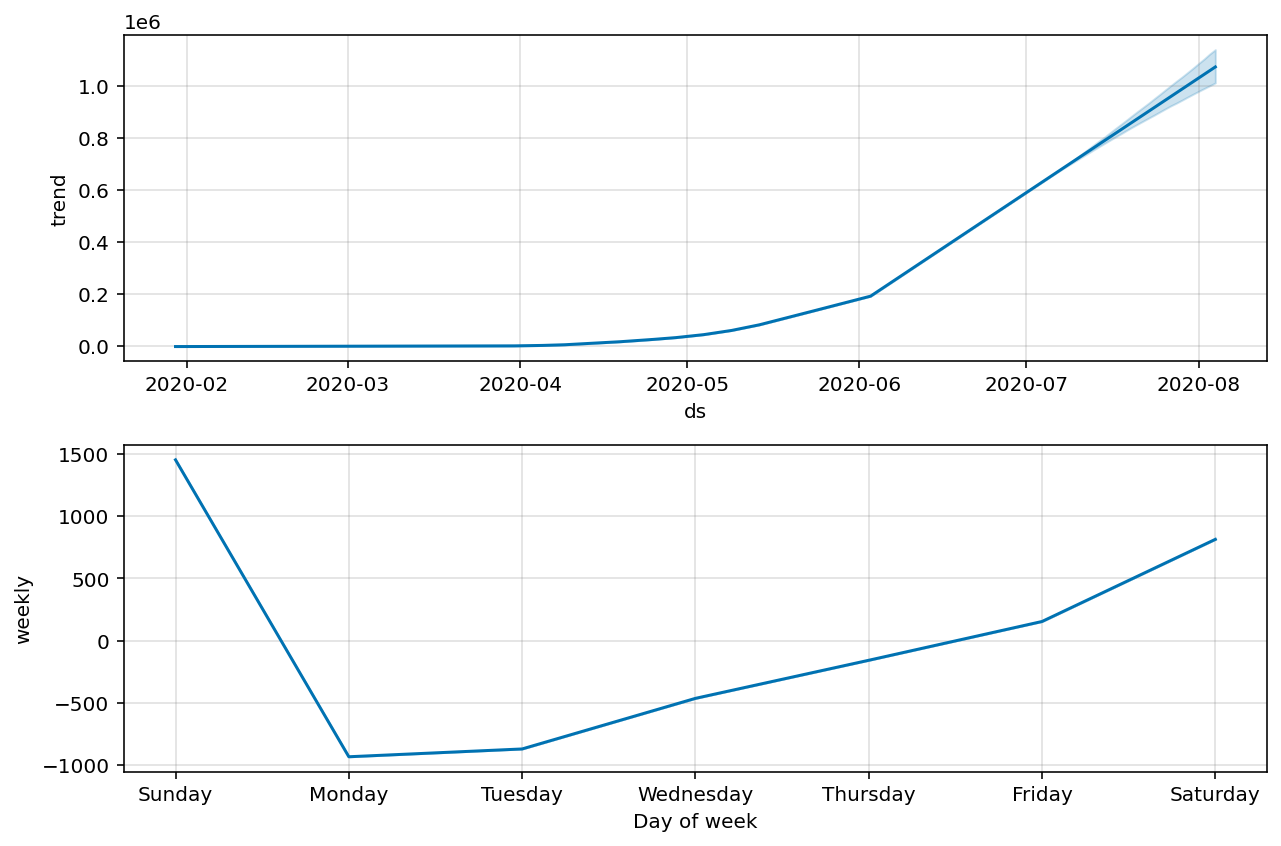

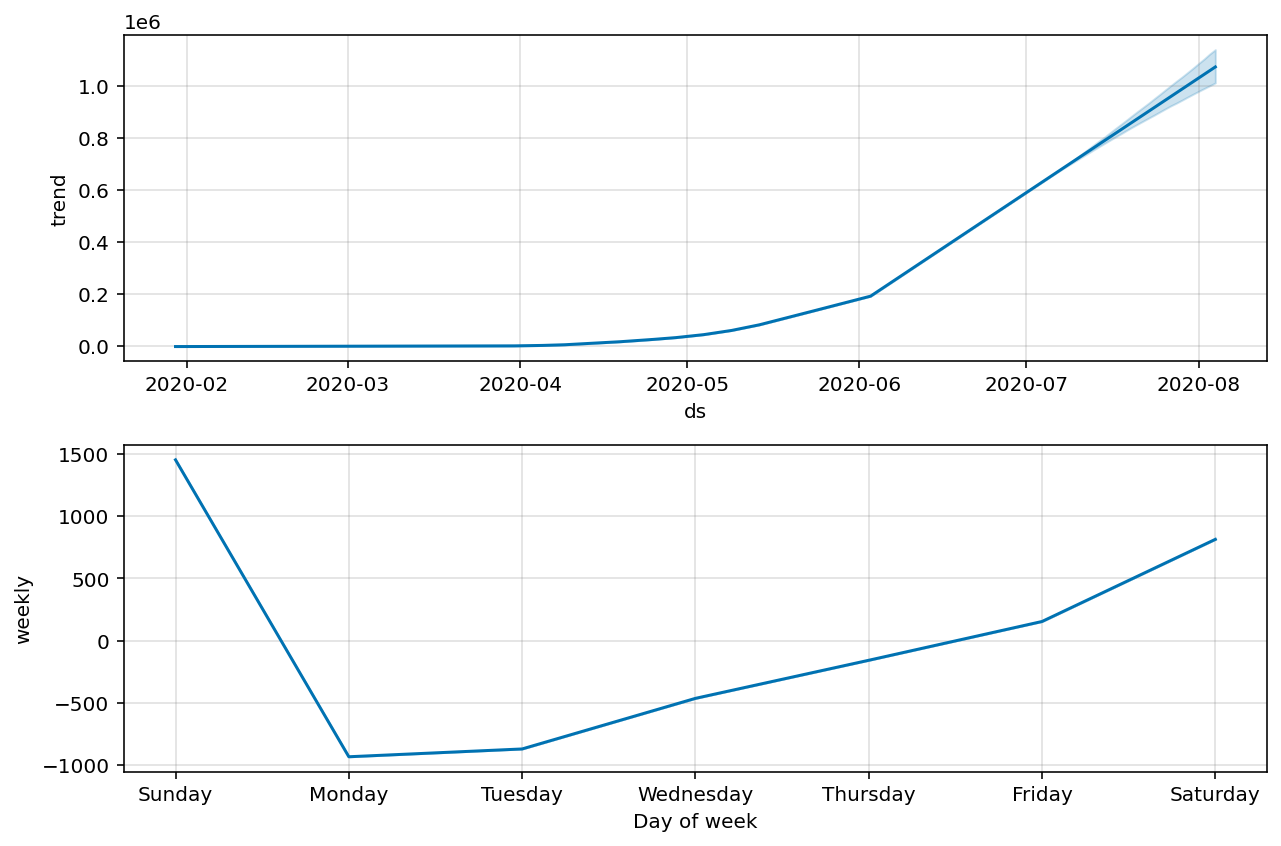

In [71]:
TC_FBP_model.plot_components(forecast)

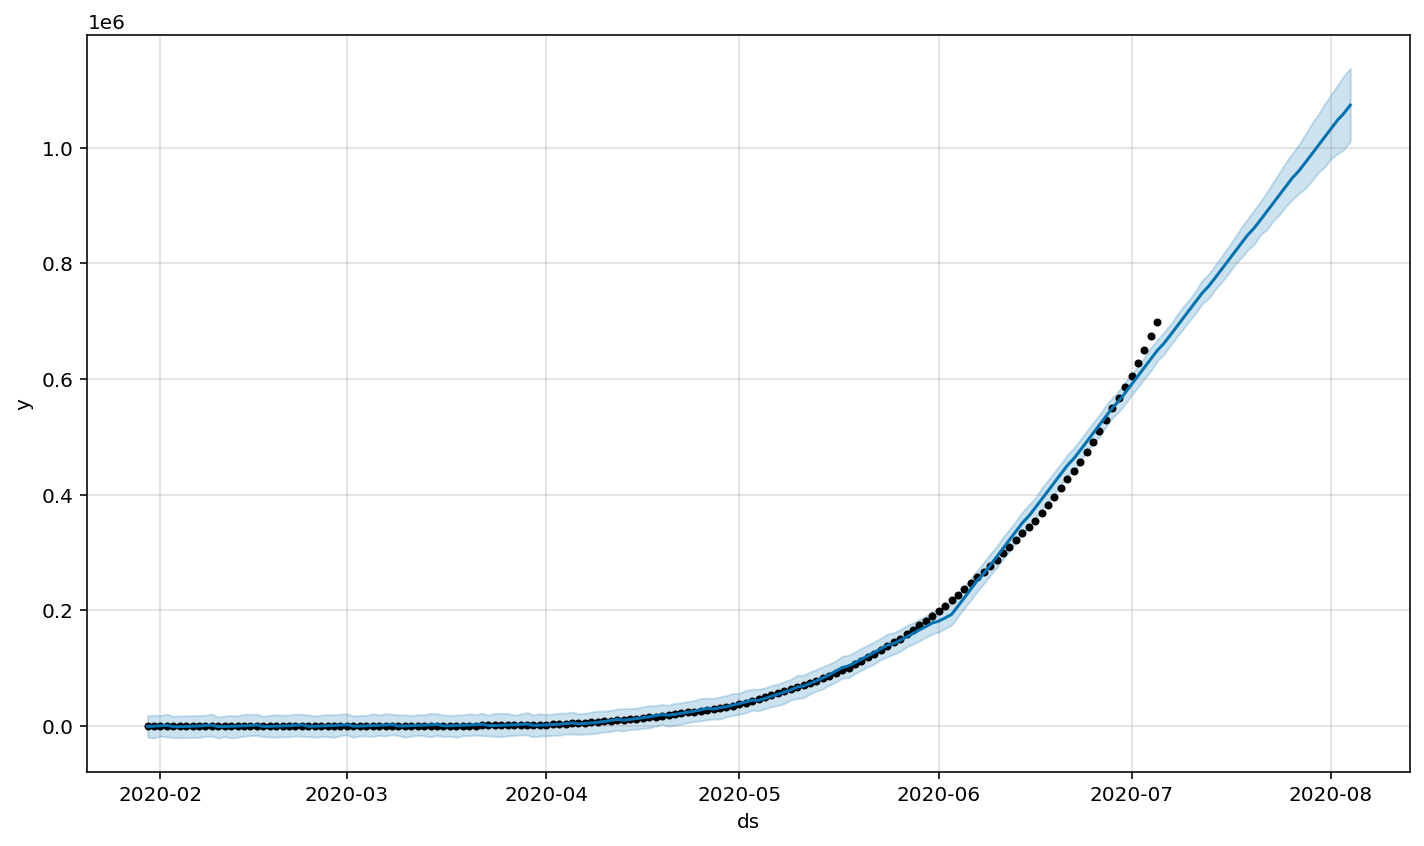

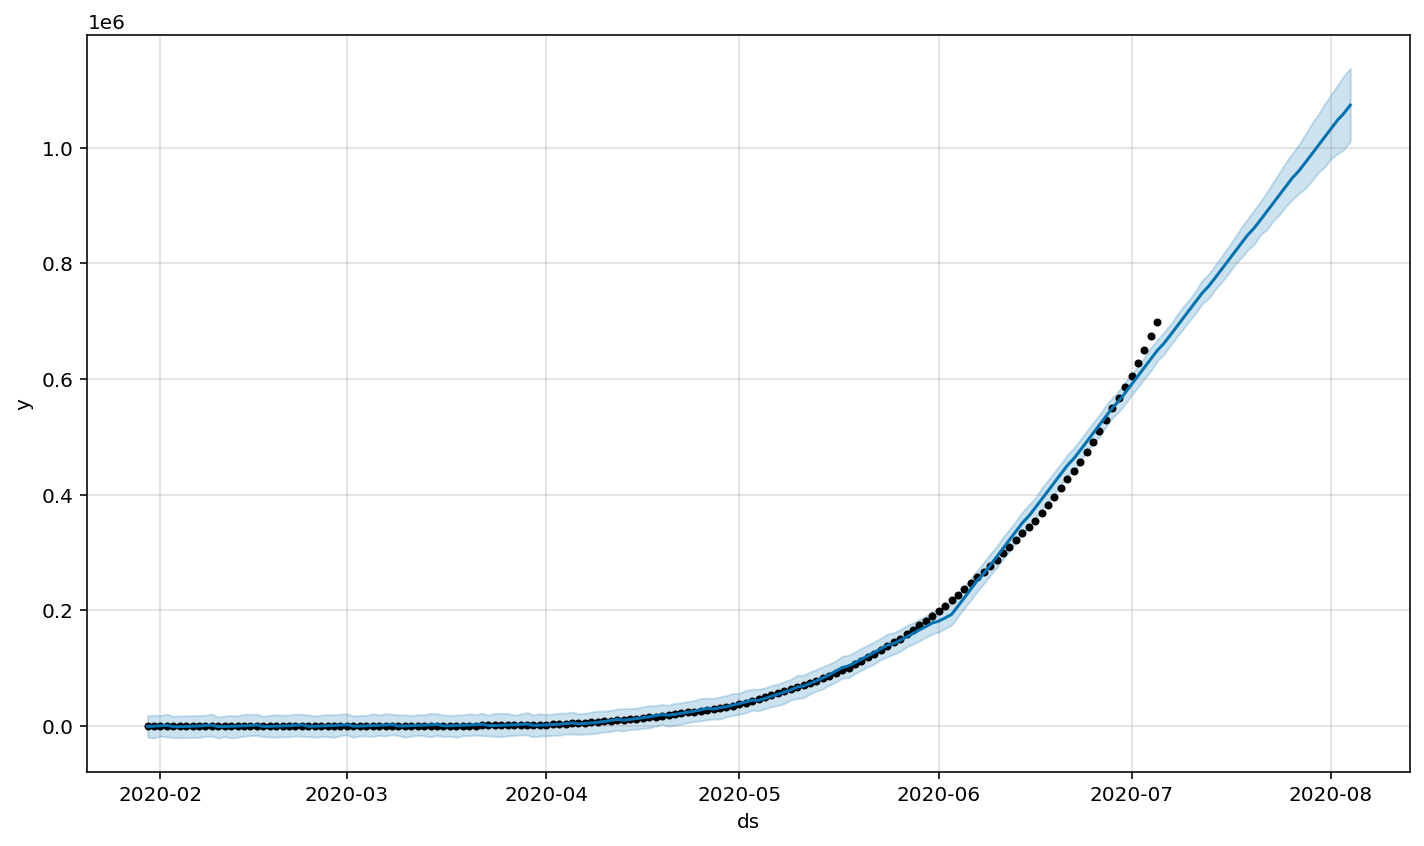

In [72]:
TC_FBP_model.plot(forecast)

#### FBP Model 2

In [73]:
TC_FBP_model2 = Prophet(interval_width=0.95, weekly_seasonality=True)

In [74]:
TC_FBP_model2.fit(total_cases)
future_dates = TC_FBP_model2.make_future_dataframe(periods=days_in_future, freq='D')
future_dates.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
183,2020-07-31
184,2020-08-01
185,2020-08-02
186,2020-08-03
187,2020-08-04


In [75]:
forecast = TC_FBP_model2.predict(future_dates);
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
183,2020-07-31,1.017701e+06,9.636180e+05,1.069768e+06,9.648643e+05,1.072551e+06,154.311077,154.311077,154.311077,154.311077,154.311077,154.311077,0.0,0.0,0.0,1.017855e+06
184,2020-08-01,1.031922e+06,9.722479e+05,1.091700e+06,9.763421e+05,1.089487e+06,813.730449,813.730449,813.730449,813.730449,813.730449,813.730449,0.0,0.0,0.0,1.032735e+06
185,2020-08-02,1.046142e+06,9.847325e+05,1.111895e+06,9.875613e+05,1.106650e+06,1451.808292,1451.808292,1451.808292,1451.808292,1451.808292,1451.808292,0.0,0.0,0.0,1.047594e+06
186,2020-08-03,1.060363e+06,9.917821e+05,1.124548e+06,9.990901e+05,1.123321e+06,-931.378752,-931.378752,-931.378752,-931.378752,-931.378752,-931.378752,0.0,0.0,0.0,1.059432e+06
187,2020-08-04,1.074584e+06,1.007109e+06,1.142866e+06,1.009950e+06,1.140244e+06,-868.775794,-868.775794,-868.775794,-868.775794,-868.775794,-868.775794,0.0,0.0,0.0,1.073715e+06


In [76]:
forecast[['ds', 'yhat', 'yhat_lower',	'yhat_upper']].tail(days_in_future).style.background_gradient(cmap='Purples')

,ds,yhat,yhat_lower,yhat_upper
158,2020-07-06 00:00:00,661250.708749,643202.488711,680863.328392
159,2020-07-07 00:00:00,675534.067598,657237.889659,695694.575047
160,2020-07-08 00:00:00,690160.902328,670769.672192,707743.250564
161,2020-07-09 00:00:00,704687.356860,685755.487423,724030.073279
162,2020-07-10 00:00:00,719219.422145,699789.487355,738207.091890
163,2020-07-11 00:00:00,734099.597408,715142.937617,753952.478968
164,2020-07-12 00:00:00,748958.431142,729580.407503,769560.762607
165,2020-07-13 00:00:00,760795.999990,740085.146271,781076.827781
166,2020-07-14 00:00:00,775079.358840,753659.558909,796597.653410
167,2020-07-15 00:00:00,789706.193570,766675.614686,809920.077888


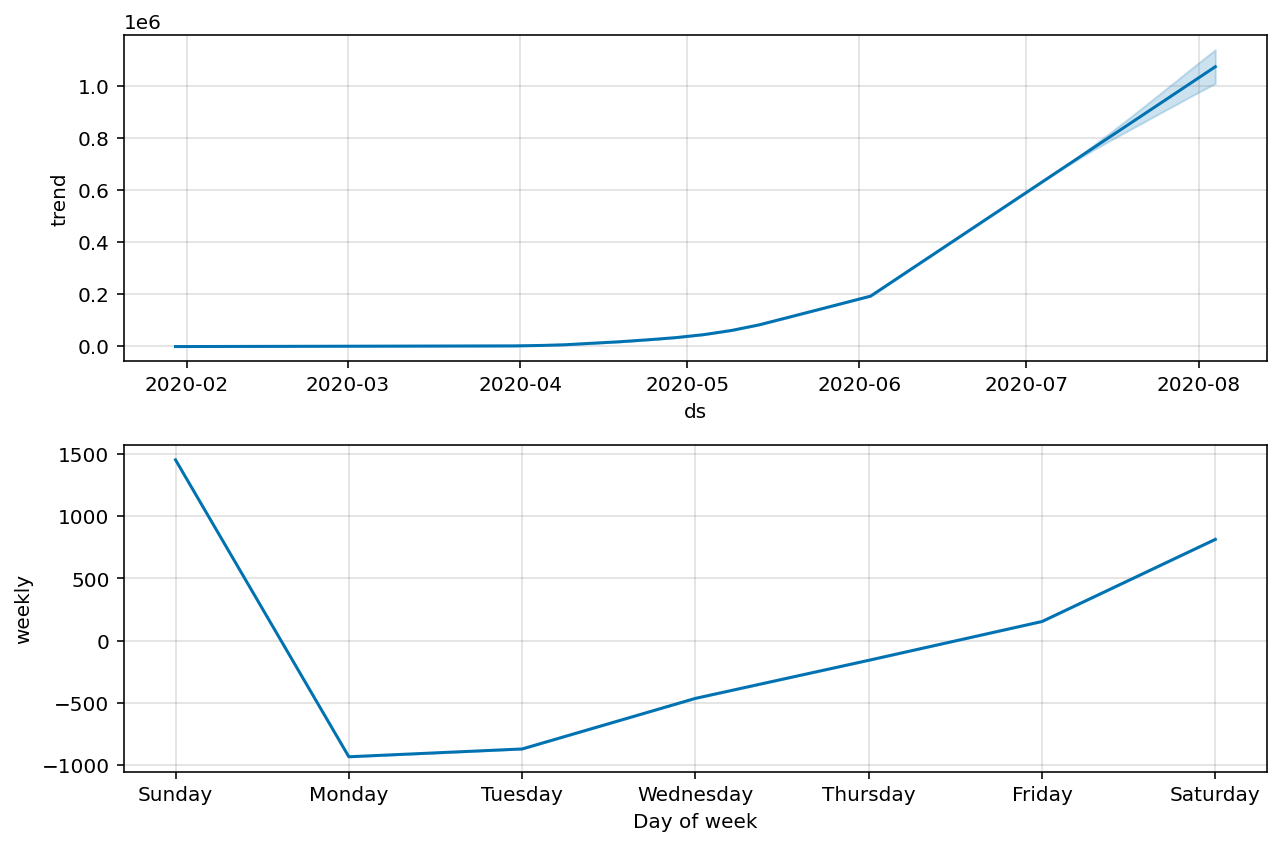

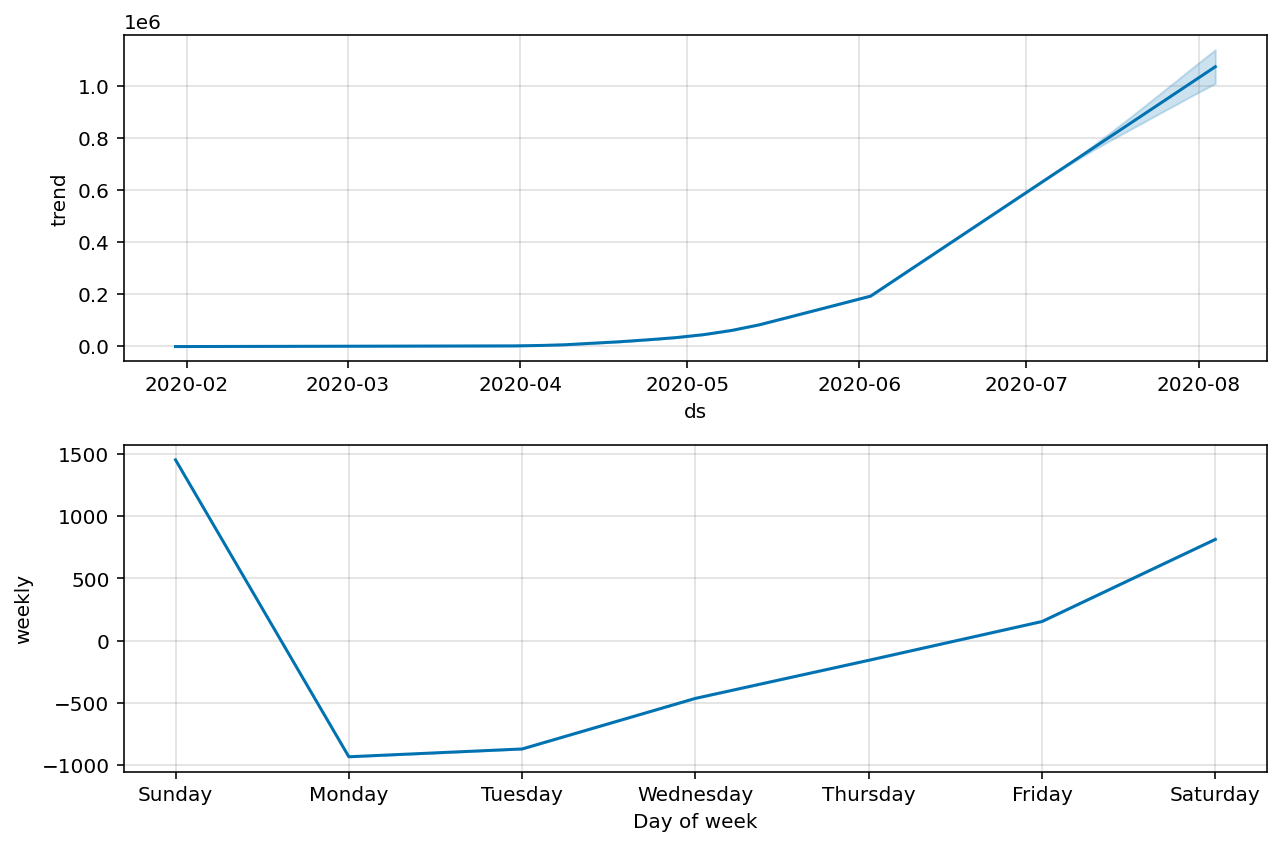

In [77]:
TC_FBP_model2.plot_components(forecast)

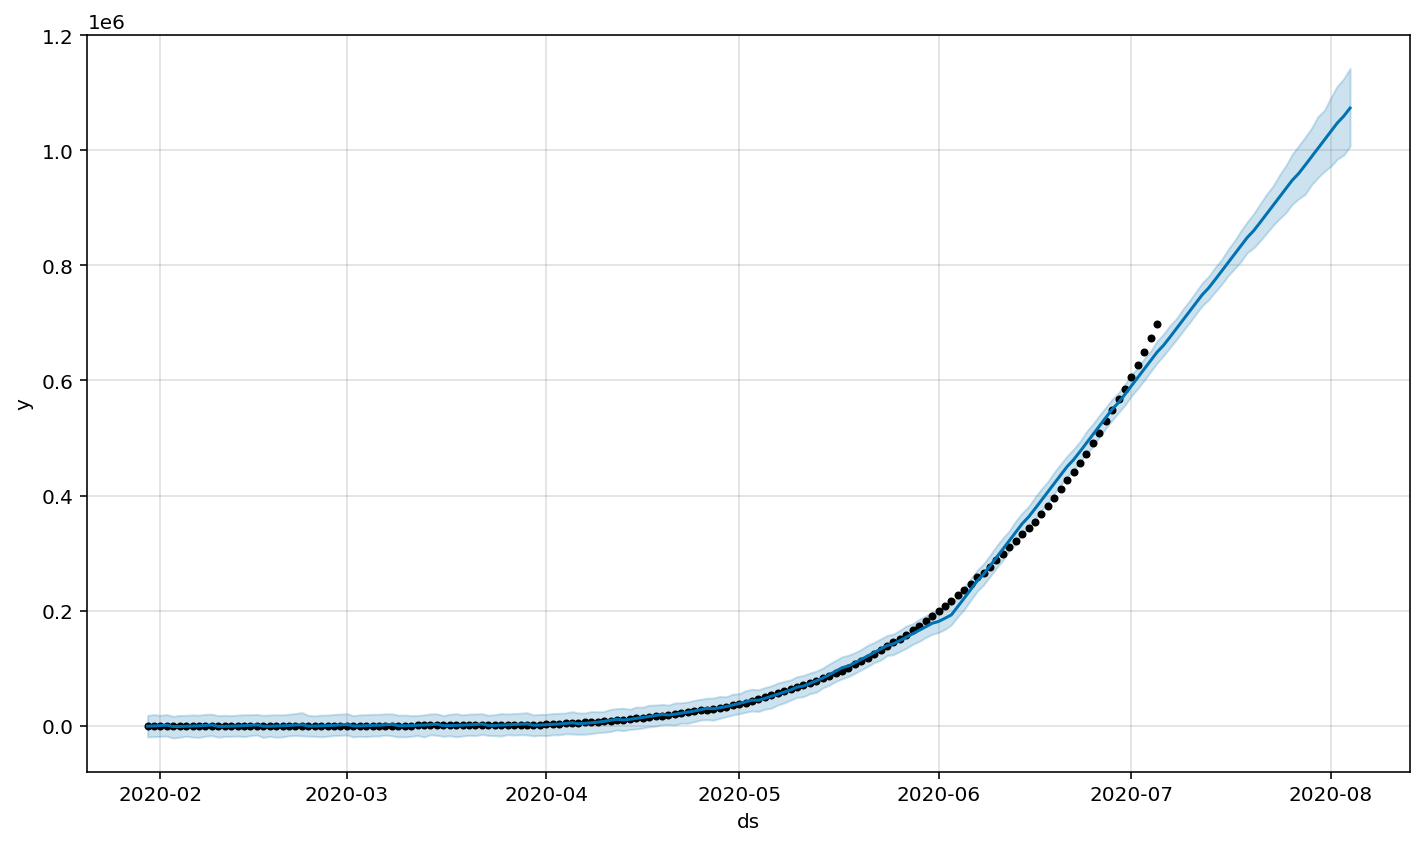

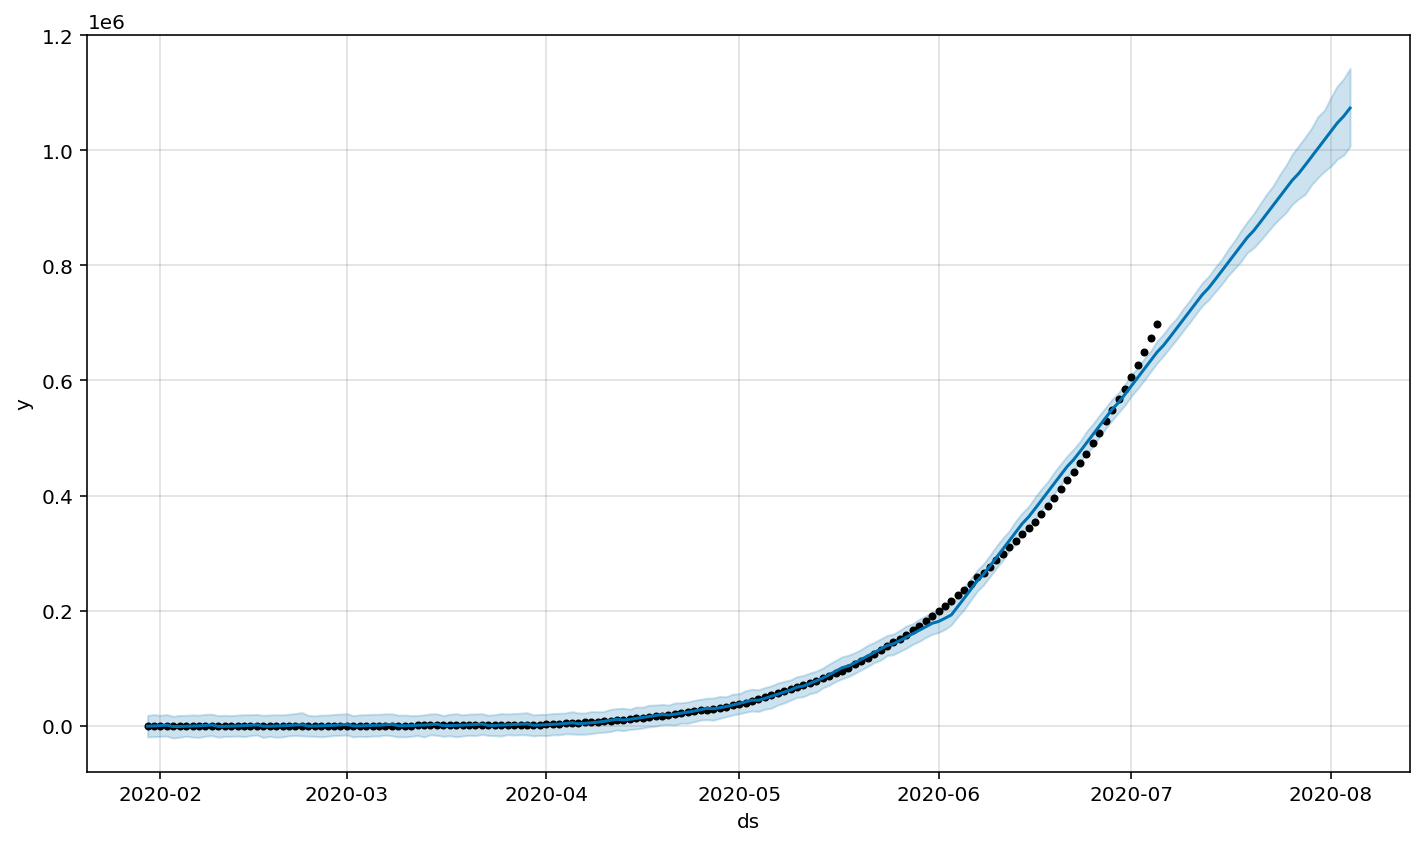

In [78]:
TC_FBP_model2.plot(forecast)

### ARIMA Model

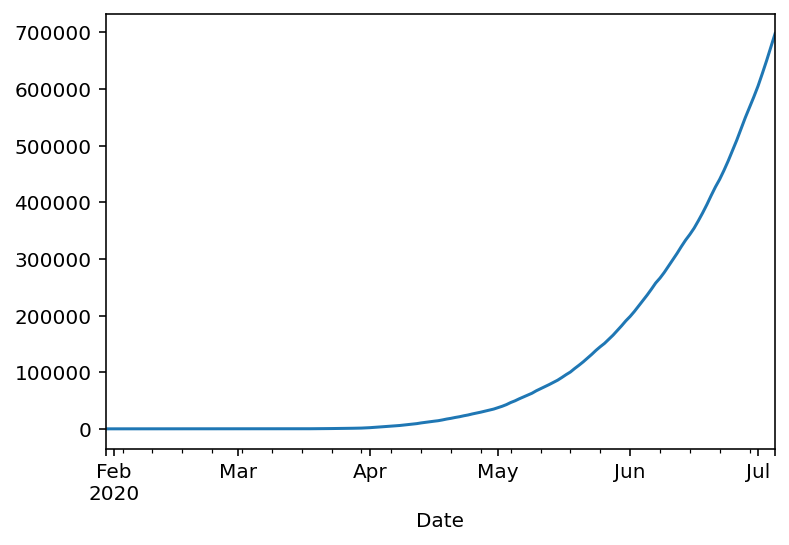

In [79]:
cases.plot()

In [80]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

**Decompose timeseries to trend, seasonal and random components using multiplicative model.**

In [81]:
decomposition = seasonal_decompose(cases, model='multiplicative')

In [82]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

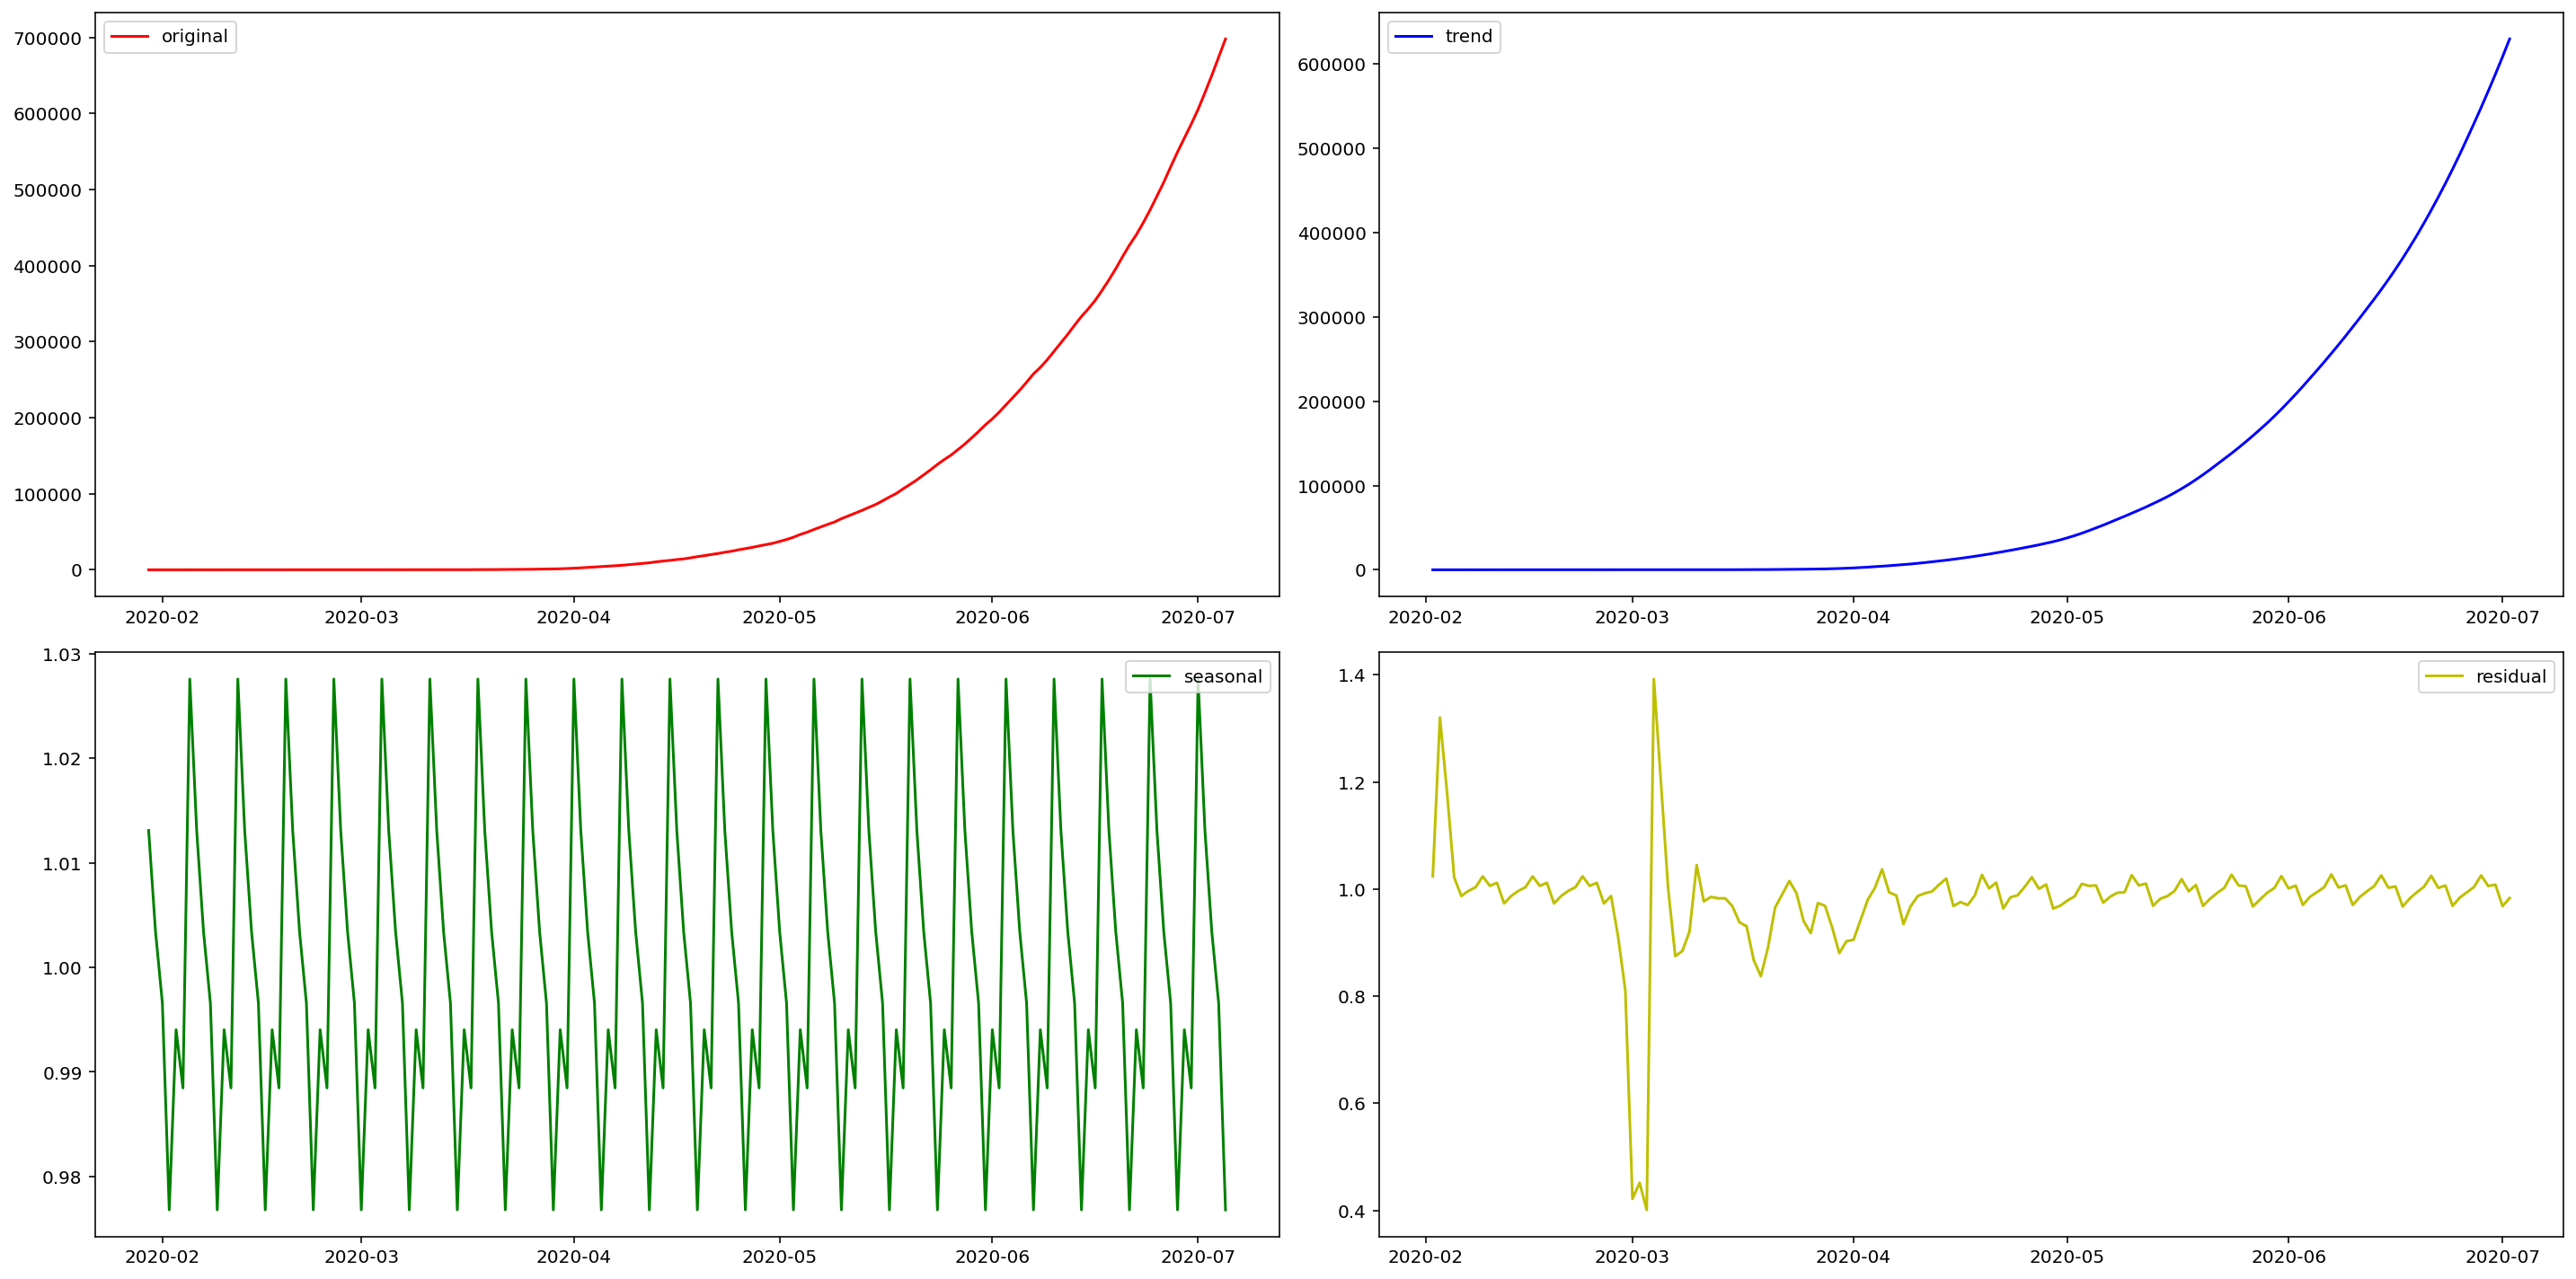

In [83]:
plt.figure(figsize=(20,10))

plt.subplot(221)
plt.plot(cases, color='r', label='original')
plt.legend(loc='best')

plt.subplot(222)
plt.plot(trend, color='b', label='trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal, color='g', label='seasonal')
plt.legend(loc='best')

plt.subplot(224)
plt.plot(residual, color='y', label='residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

**Decompose timeseries to trend, seasonal and random components using additvie model.**

In [84]:
decomposition2 = seasonal_decompose(cases, model ='additvie')

trend2 = decomposition2.trend
seasonal2 = decomposition2.seasonal
residual2 = decomposition2.resid

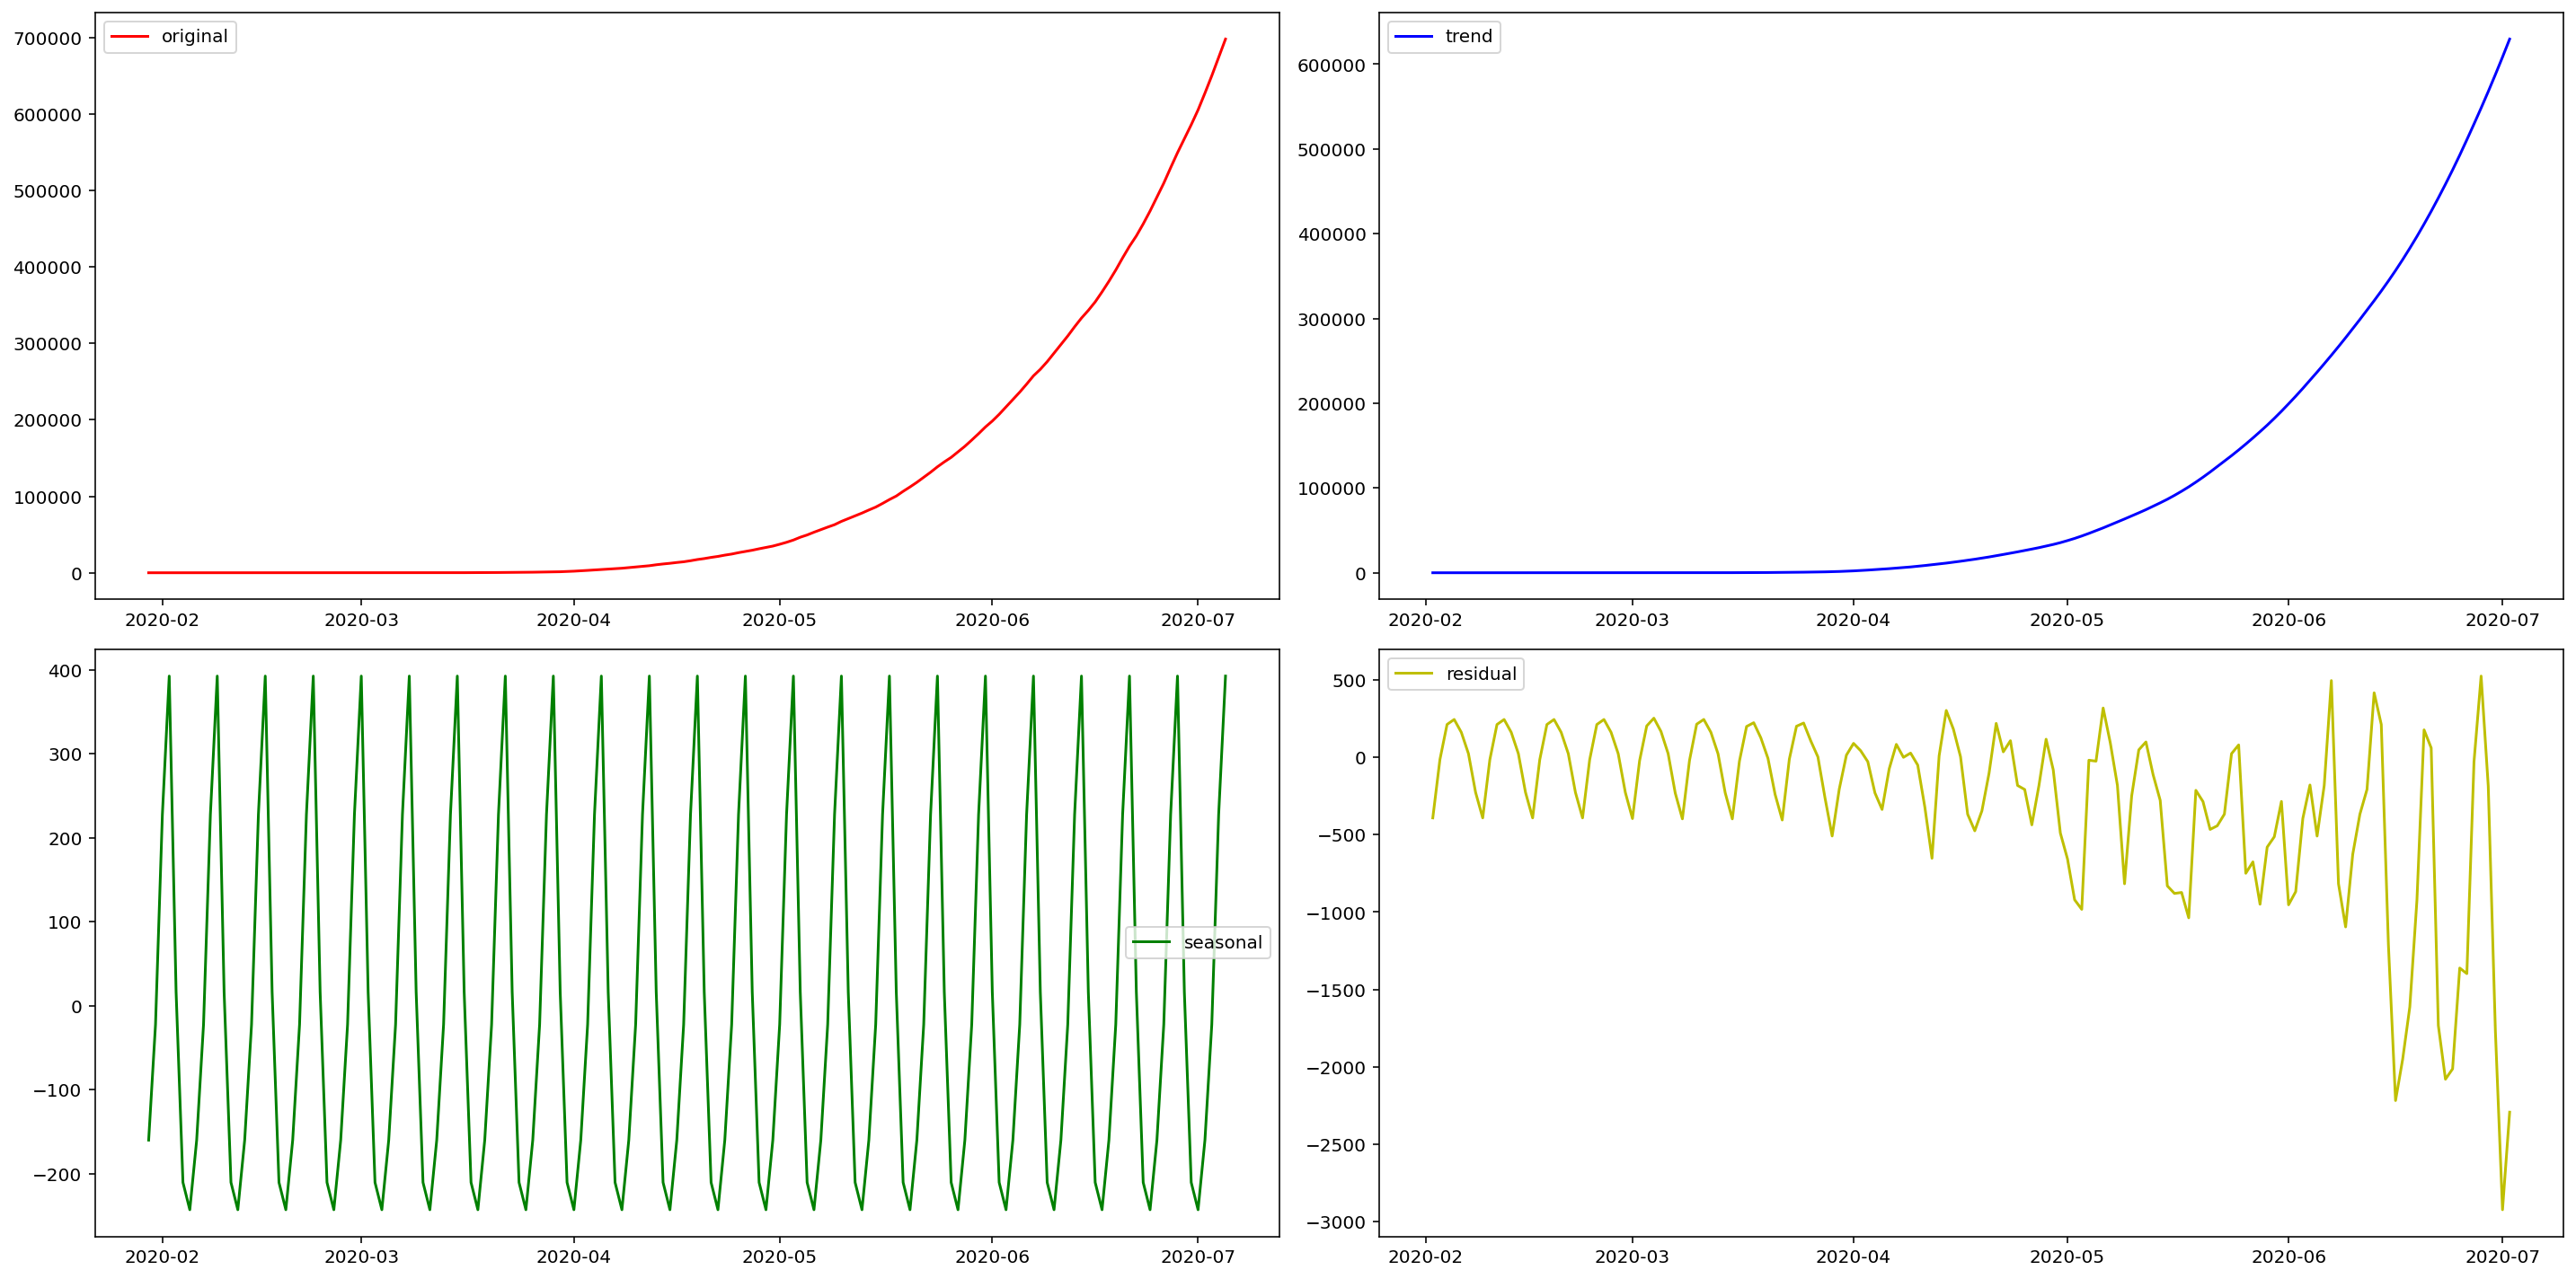

In [85]:
plt.figure(figsize=(20,10))

plt.subplot(221)
plt.plot(cases, color='r', label='original')
plt.legend(loc='best')

plt.subplot(222)
plt.plot(trend2, color='b', label='trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal2, color='g', label='seasonal')
plt.legend(loc='best')

plt.subplot(224)
plt.plot(residual2, color='y', label='residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [86]:
#!pip uninstall pyramid
#!pip uninstall pyramid-arima
#!pip install pyramid
!pip install pyramid-arima

     |████████████████████████████████| 604kB 2.8MB/s 


In [104]:
from pyramid.arima.stationarity import ADFTest
from pyramid.arima import auto_arima

In [105]:
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(cases)

(0.010000000000000009, True)

In [106]:
# Preparing indexes to predict next [days_in_future] days.
cases_future_forcast = np.array([i for i in range(len(cases.index)+days_in_future)]).reshape(-1, 1)
cases_adjusted_dates = future_forcast[:-days_in_future]

In [107]:
train, test = cases[:100], cases[100:]

In [108]:
train.shape

(100,)

In [109]:
test.shape

(58,)

In [110]:
# plt.plot(train)
# plt.plot(test)
# plt.show()

In [111]:
arima_model= auto_arima(train, trace=True, error_action='warn', start_p=1,start_q=1,max_p=5,max_q=5, suppress_warnings=True, stepwise=True, seasonal=False, random_state=20, n_fits=30)

Fit ARIMA: order=(1, 2, 1); AIC=1291.191, BIC=1301.531, Fit time=0.071 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1308.497, BIC=1313.667, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1289.284, BIC=1297.039, Fit time=0.027 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1295.676, BIC=1303.430, Fit time=0.039 seconds
Fit ARIMA: order=(2, 2, 0); AIC=1291.047, BIC=1301.387, Fit time=0.063 seconds
Fit ARIMA: order=(2, 2, 1); AIC=1422.521, BIC=1435.446, Fit time=0.488 seconds
Total fit time: 0.699 seconds


In [112]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                   98
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -641.642
Method:                       css-mle   S.D. of innovations            168.567
Date:                Sun, 05 Jul 2020   AIC                           1289.284
Time:                        18:40:17   BIC                           1297.039
Sample:                             2   HQIC                          1292.421
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.3007     11.871      2.889      0.005      11.034      57.568
ar.L1.D2.y    -0.4389      0.090     -4.881      0.000      -0.615      -0.263
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.2784           +0.0000j            2.2784            0.5000
-----------------------------------------------------------------------------
"""

In [113]:
prediction = pd.DataFrame(arima_model.predict(n_periods=len(test)), index=test.index)
prediction.columns = ['confirmed_cases_pred']

In [121]:
prediction['confirmed_cases_test'] = test
prediction['error'] = prediction['confirmed_cases_test'] - prediction['confirmed_cases_pred']
prediction.head()

,confirmed_cases_pred,confirmed_cases_test,error
Date,,,
2020-05-09,63080.549684,62865,-215.549684
2020-05-10,66497.829566,67176,678.170434
2020-05-11,69952.732844,70768,815.267156
2020-05-12,73440.478527,74330,889.521473
2020-05-13,76963.164976,78056,1092.835024


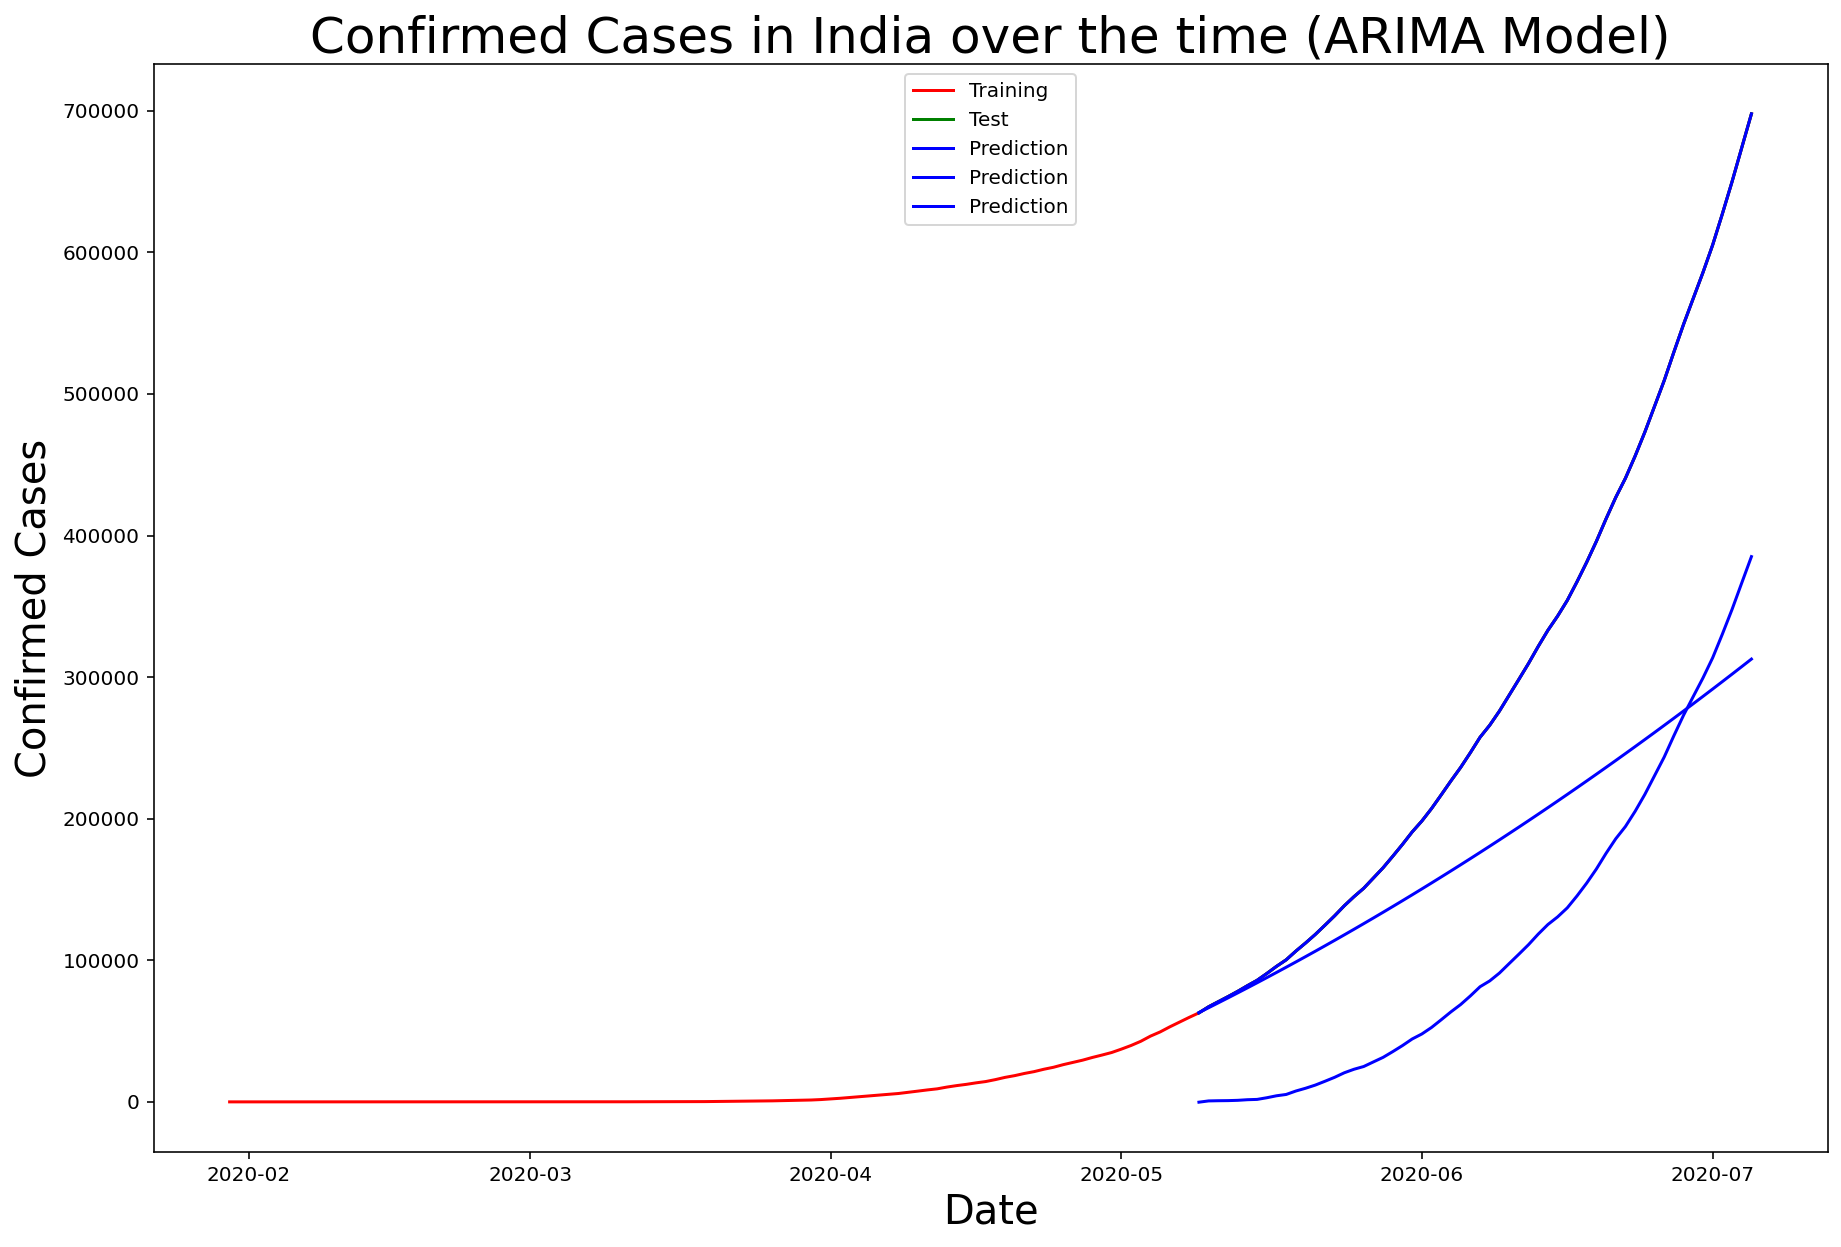

In [115]:
plt.figure(figsize=(15,10))

plt.title('Confirmed Cases in India over the time (ARIMA Model)', size=25)

plt.xlabel('Date', size=20)
plt.ylabel('Confirmed Cases', size=20)

plt.plot(cases, color='r', label='Training')
plt.plot(test, color='g', label='Test')
plt.plot(prediction, color='b', label='Prediction')

plt.legend(loc='upper center')

plt.show();

#### Random implementation

In [116]:
daily_cases = india_data["Daily Confirmed"] # india_data[india_data["Daily Confirmed"] > 0]["Daily Confirmed"]
daily_cases

Date
2020-01-30        1
2020-01-31        0
2020-02-01        0
2020-02-02        1
2020-02-03        1
              ...  
2020-07-01    19429
2020-07-02    21947
2020-07-03    22718
2020-07-04    24018
2020-07-05    23932
Name: Daily Confirmed, Length: 158, dtype: int64

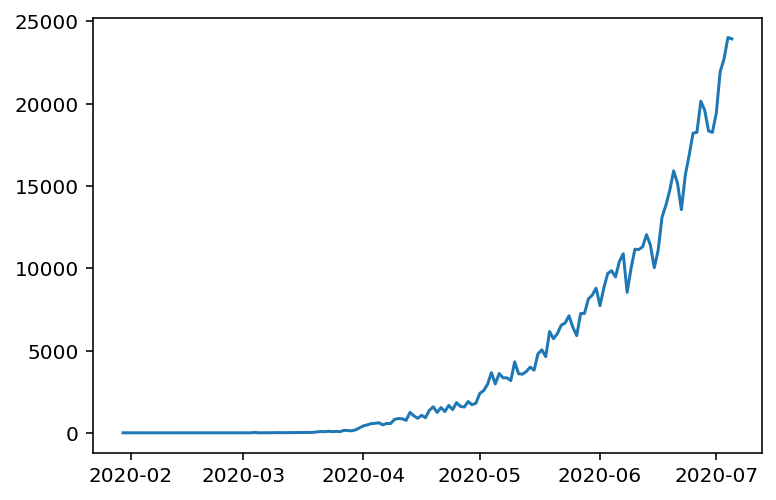

In [117]:
plt.plot(daily_cases)

In [118]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, plot_title):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() #pd.rolling_mean(timeseries, window=12)
    rolstd = timeseries.rolling(12).std() #pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    plt.figure(figsize=(12,7))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation (' + plot_title +')')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

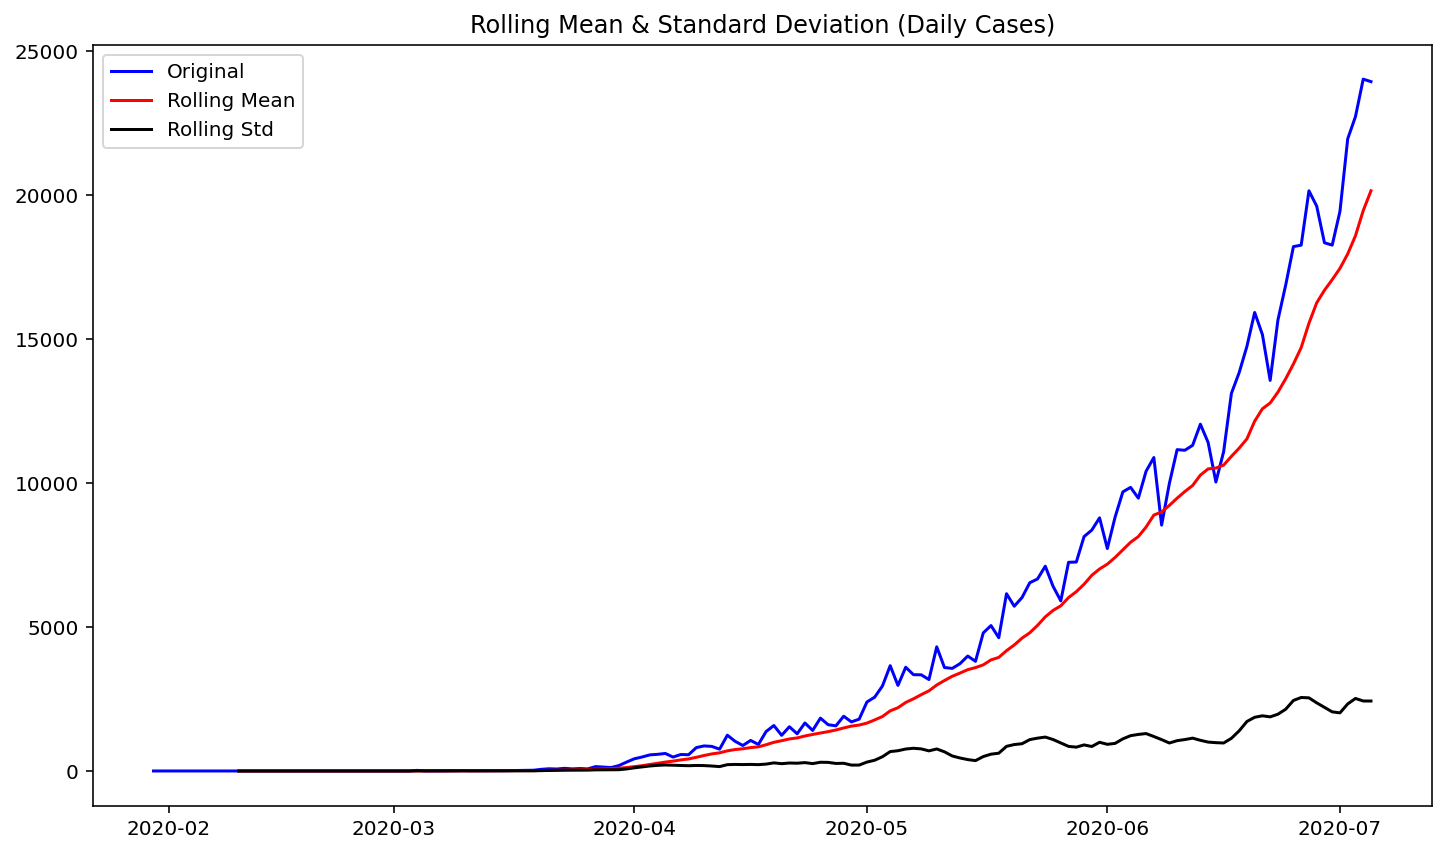

Results of Dickey-Fuller Test:
Test Statistic                   5.456408
p-value                          1.000000
#Lags Used                      13.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64


In [119]:
test_stationarity(daily_cases, 'Daily Cases')

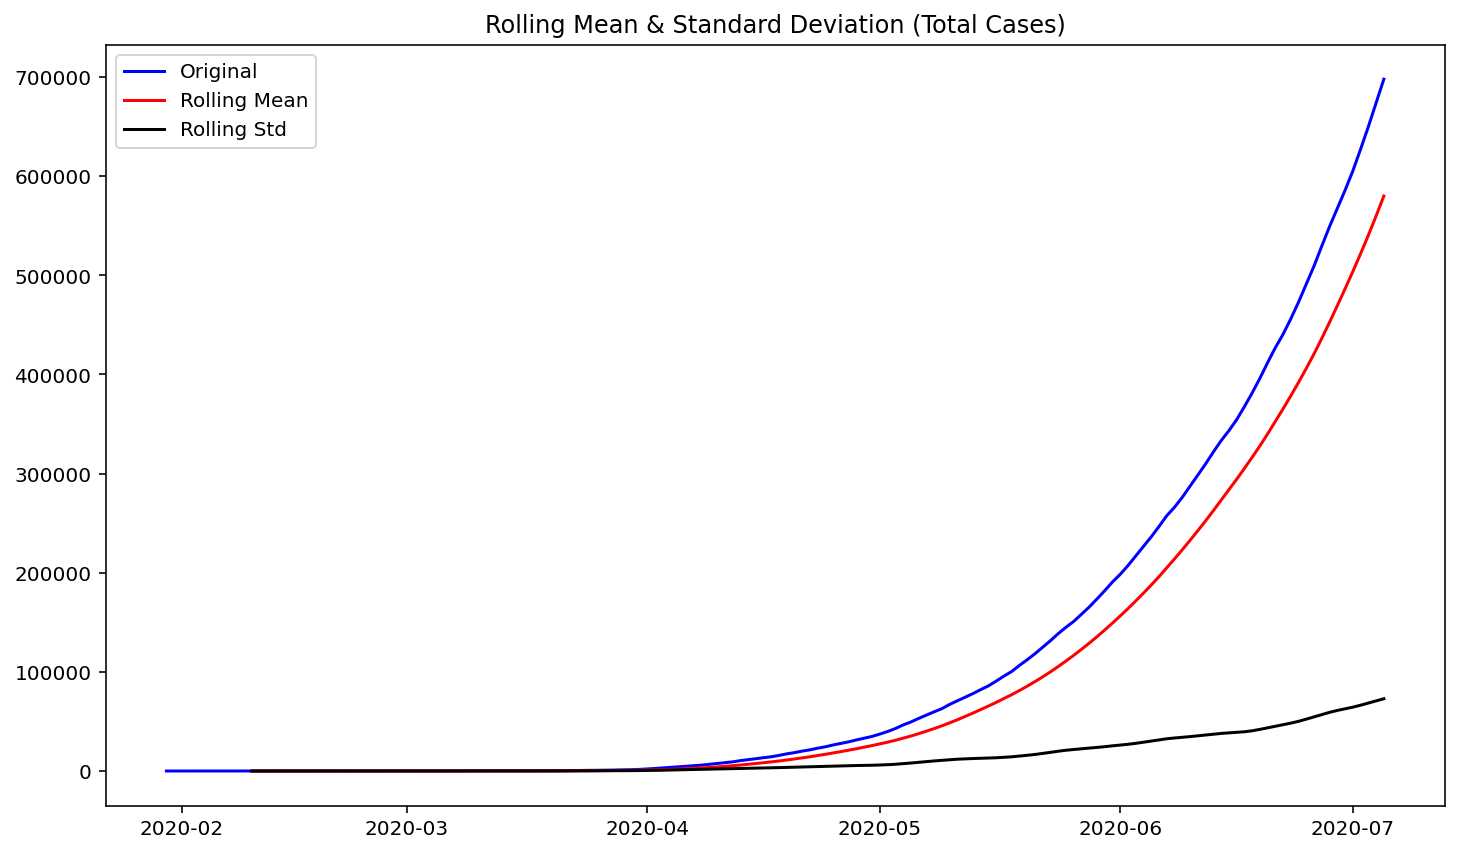

Results of Dickey-Fuller Test:
Test Statistic                  -0.221538
p-value                          0.935905
#Lags Used                      14.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [120]:
test_stationarity(cases, 'Total Cases')

Thank you very much for reading this notebook. Please follow me on Github at https://github.com/purnananda :)

#### References: 
- 1.  Covid-19 in Brazil Prediction kaggle kernel by <b>Wellington Silva</b>. Please give a upvote to his kernel so he can continue to create quality content to all kagglers..
- 2. Inida Data by covid19india.org API: https://api.covid19india.org/csv/
- 3. Global Data By Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE): https://github.com/CSSEGISandData/COVID-19